## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
print(sys.path)

['/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/IPython/extensions', '/Users/jasonfiacco/.ipython', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader']


## Read in the PredictIt Data  
Adds ALL TA features at first. Also creates the "price_norm" metric which is close/open.

In [2]:
import ssl
import pandas as pd
import ta

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol, add_ta=False):
    path = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/predictit_datasets/"
    filename = "{}.xlsx".format(symbol)



    df = pd.read_excel(path + filename, skiprows=4)
    df = df.set_index("Date")
    df = df.drop(df.columns[[7,8,9]], axis=1)
    df = df.drop("ID", 1)
    
    
    #Get the normalized price_norm column
    df['price_norm'] = df['Close']/df['Open']
    
    #Rename
    df.columns = [symbol + ":" + name.lower() for name in df.columns]
    
    #Add all the TA extra features
    if add_ta:
        ta.add_all_ta_features(
            df, 
            colprefix=symbol+":",
            **{k: symbol+":" + k for k in ['open', 'high', 'low', 'close', 'volume']}
        )

    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN", add_ta=True),
    fetch_data("CRUZ", add_ta=True),
    fetch_data("MANCHIN", add_ta=True),
    fetch_data("SANDERS", add_ta=True),
    fetch_data("NELSON", add_ta=True),
    fetch_data("DONNELLY", add_ta=True),
    fetch_data("PELOSI", add_ta=True),
    fetch_data("MANAFORT", add_ta=True),
    fetch_data("BROWN", add_ta=True),
    fetch_data("RYAN", add_ta=True),
    fetch_data("STABENOW", add_ta=True)
], axis=1)
all_data.head()

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,WARREN:price_norm,WARREN:volume_adi,WARREN:volume_obv,WARREN:volume_cmf,...,STABENOW:momentum_uo,STABENOW:momentum_stoch,STABENOW:momentum_stoch_signal,STABENOW:momentum_wr,STABENOW:momentum_ao,STABENOW:momentum_kama,STABENOW:momentum_roc,STABENOW:others_dr,STABENOW:others_dlr,STABENOW:others_cr
Date,,,,,,,,,,,,,,,,,,,,,
11/13/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/14/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/15/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/16/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/17/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot the closing prices for all the markets

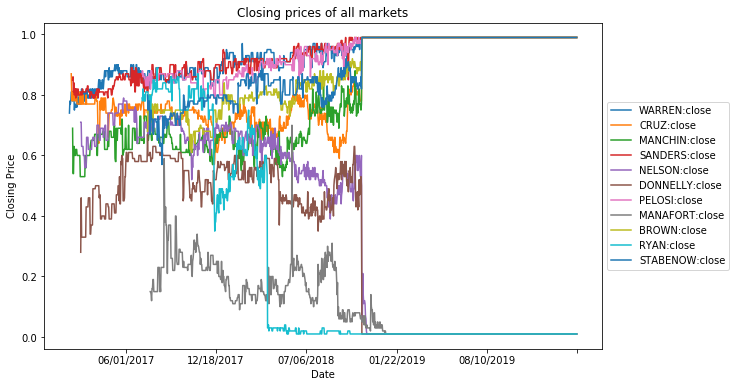

In [4]:
import matplotlib.pyplot as plt
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

## Slice just a specific time period from the dataframe

In [5]:
all_data.index = pd.to_datetime(all_data.index)

In [6]:
subset_data = all_data[(all_data.index >= '09-01-2017') & (all_data.index <= '09-04-2019')]
subset_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,WARREN:price_norm,WARREN:volume_adi,WARREN:volume_obv,WARREN:volume_cmf,...,STABENOW:momentum_uo,STABENOW:momentum_stoch,STABENOW:momentum_stoch_signal,STABENOW:momentum_wr,STABENOW:momentum_ao,STABENOW:momentum_kama,STABENOW:momentum_roc,STABENOW:others_dr,STABENOW:others_dlr,STABENOW:others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0.85,0.85,0.85,0.85,0,0.0000,1.000000,-5981.533333,1608,-0.436170,...,59.385809,65.000000,76.019900,-35.000000,0.035765,0.686323,22.807018,-2.777778,-2.817088,NaN
2017-09-02,0.85,0.85,0.85,0.85,0,0.0000,1.000000,-5981.533333,1608,-0.436170,...,48.509615,65.000000,68.333333,-35.000000,0.030353,0.686861,12.903226,0.000000,0.000000,NaN
2017-09-03,0.85,0.84,0.85,0.84,74,0.8400,0.988235,-6055.533333,1534,-0.553371,...,56.737850,75.000000,68.333333,-25.000000,0.027353,0.687509,-1.369863,2.857143,2.817088,NaN
2017-09-04,0.84,0.84,0.85,0.85,10,0.8500,1.011905,-6045.533333,1544,-0.509589,...,55.483476,66.666667,68.888889,-33.333333,0.029618,0.688620,9.090909,0.000000,0.000000,NaN
2017-09-05,0.85,0.84,0.85,0.84,43,0.8479,0.988235,-6088.533333,1501,-0.558025,...,55.755297,85.714286,75.793651,-14.285714,0.031882,0.689066,2.857143,0.000000,0.000000,NaN


## Define The Exchange

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [7]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close']))
)

Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

## Define "External Data Feed". This is where you specify custom features

In [8]:
#Select only the TA features to keep
features_to_keep = ["price_norm", "volume", "trend_cci", "momentum_rsi"]
feature_data = subset_data.loc[:, [(any(word in name for word in features_to_keep)) for name in subset_data.columns]]

#Remove any extra volume columns
feature_data = feature_data[feature_data.columns.drop(list(feature_data.filter(regex='volume_')))]

feature_data.head()

,WARREN:volume,WARREN:price_norm,WARREN:trend_cci,WARREN:momentum_rsi,CRUZ:volume,CRUZ:price_norm,CRUZ:trend_cci,CRUZ:momentum_rsi,MANCHIN:volume,MANCHIN:price_norm,...,BROWN:trend_cci,BROWN:momentum_rsi,RYAN:volume,RYAN:price_norm,RYAN:trend_cci,RYAN:momentum_rsi,STABENOW:volume,STABENOW:price_norm,STABENOW:trend_cci,STABENOW:momentum_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0,1.000000,-80.808081,39.559696,940,1.012987,178.045515,68.003698,185,1.044118,...,66.666667,52.511983,0,1.000000,-55.555556,46.878766,16,0.972222,47.393365,50.311062
2017-09-02,0,1.000000,-74.561404,39.559696,0,1.000000,163.265306,68.003698,0,1.000000,...,66.666667,52.511983,0,1.000000,-55.555556,46.878766,45,1.000000,45.042160,50.311062
2017-09-03,74,0.988235,-111.904762,32.511005,0,1.000000,136.363636,68.003698,0,1.000000,...,66.666667,52.511983,0,1.000000,-55.555556,46.878766,1,1.028571,58.670007,53.297763
2017-09-04,10,1.011905,-81.871345,43.376235,0,1.000000,117.647059,68.003698,0,1.000000,...,66.666667,52.511983,120,0.987805,-101.503759,40.845343,0,1.000000,62.634063,53.297763
2017-09-05,43,0.988235,-101.092896,36.967017,0,1.000000,103.585657,68.003698,50,0.943662,...,60.606061,52.511983,52,1.000000,20.356234,40.845343,9,1.000000,60.168472,53.297763


In [9]:
#Normalize the technical features
features_to_norm = ["volume", "trend_cci", "momentum_rsi"]
cols_to_norm = [name for name in feature_data.columns if any(word in name for word in features_to_norm) ]
feature_data[cols_to_norm] = feature_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
feature_data.head()

,WARREN:volume,WARREN:price_norm,WARREN:trend_cci,WARREN:momentum_rsi,CRUZ:volume,CRUZ:price_norm,CRUZ:trend_cci,CRUZ:momentum_rsi,MANCHIN:volume,MANCHIN:price_norm,...,BROWN:trend_cci,BROWN:momentum_rsi,RYAN:volume,RYAN:price_norm,RYAN:trend_cci,RYAN:momentum_rsi,STABENOW:volume,STABENOW:price_norm,STABENOW:trend_cci,STABENOW:momentum_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0.000000,1.000000,0.403676,0.357186,0.002808,1.012987,0.711562,0.786935,0.001916,1.044118,...,0.549708,0.505893,0.000000,1.000000,0.967271,0.512535,0.000082,0.972222,0.680470,0.575608
2017-09-02,0.000000,1.000000,0.413031,0.357186,0.000000,1.000000,0.693546,0.786935,0.000000,1.000000,...,0.549708,0.505893,0.000000,1.000000,0.967271,0.512535,0.000230,1.000000,0.678582,0.575608
2017-09-03,0.002695,0.988235,0.357105,0.234853,0.000000,1.000000,0.660756,0.786935,0.000000,1.000000,...,0.549708,0.505893,0.000000,1.000000,0.967271,0.512535,0.000005,1.028571,0.689525,0.630811
2017-09-04,0.000364,1.011905,0.402083,0.423424,0.000000,1.000000,0.637942,0.786935,0.000000,1.000000,...,0.549708,0.505893,0.005399,0.987805,0.965189,0.422239,0.000000,1.000000,0.692708,0.630811
2017-09-05,0.001566,0.988235,0.373297,0.312189,0.000000,1.000000,0.620803,0.786935,0.000518,0.943662,...,0.542265,0.505893,0.002340,1.000000,0.970711,0.422239,0.000046,1.000000,0.690728,0.630811


In [11]:
#Add "Streams" for all my external added features.
from tensortrade.data import DataFeed, Module

with Module("predictit") as predictit_ns:
    predictit_nodes = [Stream(name, list(feature_data[name])) for name in feature_data.columns]
    

In [12]:
#Then create the Feed from it
external_feed = DataFeed([predictit_ns])
external_feed.next()

{'predictit:/WARREN:volume': 0.0,
 'predictit:/WARREN:price_norm': 1.0,
 'predictit:/WARREN:trend_cci': 0.4036756304414346,
 'predictit:/WARREN:momentum_rsi': 0.35718628615104175,
 'predictit:/CRUZ:volume': 0.0028076463560334527,
 'predictit:/CRUZ:price_norm': 1.012987012987013,
 'predictit:/CRUZ:trend_cci': 0.7115617565116659,
 'predictit:/CRUZ:momentum_rsi': 0.786934927206961,
 'predictit:/MANCHIN:volume': 0.001916065954097274,
 'predictit:/MANCHIN:price_norm': 1.0441176470588234,
 'predictit:/MANCHIN:trend_cci': 0.925804688377535,
 'predictit:/MANCHIN:momentum_rsi': 0.8095794663023808,
 'predictit:/SANDERS:volume': 0.0,
 'predictit:/SANDERS:price_norm': 1.0,
 'predictit:/SANDERS:trend_cci': 0.3072513672803388,
 'predictit:/SANDERS:momentum_rsi': 0.34242116152293745,
 'predictit:/NELSON:volume': 0.0,
 'predictit:/NELSON:price_norm': 1.0,
 'predictit:/NELSON:trend_cci': 0.016925133468624048,
 'predictit:/NELSON:momentum_rsi': 0.7408481956126248,
 'predictit:/DONNELLY:volume': 0.000190

## Portfolio

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [13]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 10000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW)
])

## First Launch Ray. 
This is where you define our training "Trading Enviroment," which includes things such as the action scheme, the reward scheme, the window size, and whether or not to use the "interal feed" (internal data feed has all the price data from the wallets and the networth of the portfolio).

In [14]:
#Add the deeptrader path to ALL workers, not just the current worker
import os
parent_dir = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader"
os.environ["PYTHONPATH"] = parent_dir + ":" + os.environ.get("PYTHONPATH", "")

In [15]:
#Try and get rid of that yaml warning (although this only does it for THIS worker)
import yaml
yaml.warnings({'YAMLLoadWarning': False})

In [16]:
# Environment
from tensortrade.environments import TradingEnvironment


import gym
import ray
from ray import tune
from ray.tune import grid_search
from ray.tune.registry import register_env

import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from tensortrade.rewards import RiskAdjustedReturns
    
class RayTradingEnv(TradingEnvironment):
    def __init__(self):        
        env = TradingEnvironment(
            feed=external_feed,
            portfolio=portfolio,
            action_scheme="simple",
            reward_scheme="risk-adjusted",
            window_size=15,
            enable_logger=False,
            renderers = 'screenlog'
        ) 
        self.env = env
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space
        
        

    def reset(self):
        return self.env.reset()

    def step(self, action):
        return self.env.step(action)

def env_creator(env_config):
    return RayTradingEnv()

register_env("ray_trading_env", env_creator)


#ray.init(ignore_reinit_error=True, local_mode=True)

## Train using Tune

In [17]:
analysis = tune.run(
        "DQN",
        name = "DQN22",
        checkpoint_freq = 100,
        checkpoint_at_end=True,
        stop={
            "timesteps_total": 1000000,
        },
        config={
            "env": "ray_trading_env",
            "lr": grid_search([1e-4]),  # try different lrs
            "num_workers": 6,  # parallelism,
            #"eager": "true",
        },
        
    )

2020-03-14 18:47:00,114	INFO resource_spec.py:212 -- Starting Ray with 5.76 GiB memory available for workers and up to 2.9 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-14 18:47:00,514	INFO services.py:1078 -- View the Ray dashboard at localhost:8265


Trial name,status,loc,lr
DQN_ray_trading_env_b7aa9818,RUNNING,,


(pid=61750) 2020-03-14 18:47:05,359	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
(pid=61750) 2020-03-14 18:47:06,768	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=61750) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:
(pid=61750) 
(pid=61750) calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=61750) 
(pid=61750) 2020-03-14 18:47:08,402	WARNING util.py:37 -- Install gputil for GPU system monitoring.
(pid=61752) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:
(pid=61752) 
(pid=61752) calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Ple

Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-47-28
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1008
    num_steps_trained: 0
    num_target_updates: 2
    opt_peak_throughput: 0.0
    opt_samples: .nan
    replay_time_ms: .nan
    sample_time_ms: 240.257
    update_time_ms: 12.443
  iterations_since_restore: 1
  node_ip: 192.168.0.175
  num_healthy_workers: 6
  off_policy_estimator: {}
  perf:
    cpu_util_percent: 65.34666666666666
    ram_util_percent: 63.033333333333324
  pid: 61750
  policy_reward_max: {}
  policy_reward_mean: {}
  policy_reward_min: {}

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,nan,20.4847,1008,1


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-47-42
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: 9.889
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 4.5821146965026855
        mean_q: 2.0337557792663574
        mean_td_error: 4067408.5
        mean_td_error_squared: 16543812419584.0
        min_q: -0.12661349773406982
        model: {}
    num_steps_sampled: 2016
    num_steps_trained: 1344
    num_target_updates: 4
    opt_peak_throughput: 3235.815
    opt_samples: 32.0
    replay_time_ms: 4.147
    sample_time_ms: 285.21
    update_time_ms: 13.522
  iteration

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,nan,33.9388,2016,2


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-47-56
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    grad_time_ms: 10.013
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 4.672907829284668
        mean_q: 1.4706473350524902
        mean_td_error: -4501662.0
        mean_td_error_squared: 20264960131072.0
        min_q: -1.5848867893218994
        model: {}
    num_steps_sampled: 3024
    num_steps_trained: 2688
    num_target_updates: 6
    opt_peak_throughput: 3195.79
    opt_samples: 32.0
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,nan,48.3881,3024,3


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-48-12
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    grad_time_ms: 10.199
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 4.209677219390869
        mean_q: 2.2695536613464355
        mean_td_error: -10603452.0
        mean_td_error_squared: 112433192501248.0
        min_q: -0.15967321395874023
        model: {}
    num_steps_sampled: 4032
    num_steps_trained: 4032
    num_target_updates: 8
    opt_peak_throughput: 3137.658
    opt_samples: 32.

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,nan,64.3277,4032,4


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-48-26
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 650786194.1295273
  episode_reward_mean: -81942099.89050154
  episode_reward_min: -560336207.3450462
  episodes_this_iter: 6
  episodes_total: 6
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    grad_time_ms: 9.472
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 5.098526477813721
        mean_q: 3.328953504562378
        mean_td_error: 822816.75
        mean_td_error_squared: 677027381248.0
        min_q: 1.8395880460739136
        model: {}
    num_steps_sampled: 5040
    num_steps_trained: 5376
    num_target_updates: 10
    opt_peak_through

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-8.19421e+07,77.466,5040,5


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-48-37
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 650786194.1295273
  episode_reward_mean: -81942099.89050154
  episode_reward_min: -560336207.3450462
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    grad_time_ms: 9.343
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 5.675796985626221
        mean_q: 3.470777988433838
        mean_td_error: -10764260.0
        mean_td_error_squared: 115869292167168.0
        min_q: 1.957106590270996
        model: {}
    num_steps_sampled: 6048
    num_steps_trained: 6720
    num_target_updates: 12
    opt_peak_thr

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-8.19421e+07,89.4233,6048,6


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-48-51
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 650786194.1295273
  episode_reward_mean: -81942099.89050154
  episode_reward_min: -560336207.3450462
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    grad_time_ms: 9.706
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 6.182037353515625
        mean_q: 4.445854663848877
        mean_td_error: 619149.5
        mean_td_error_squared: 383346114560.0
        min_q: 1.9443598985671997
        model: {}
    num_steps_sampled: 7056
    num_steps_trained: 8064
    num_target_updates: 14
    opt_peak_throughp

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-8.19421e+07,102.969,7056,7


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-49-06
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 650786194.1295273
  episode_reward_mean: -81942099.89050154
  episode_reward_min: -560336207.3450462
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    grad_time_ms: 10.371
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 6.153781890869141
        mean_q: 4.450420379638672
        mean_td_error: 15830486.0
        mean_td_error_squared: 250604295290880.0
        min_q: 2.1302778720855713
        model: {}
    num_steps_sampled: 8064
    num_steps_trained: 9408
    num_target_updates: 16
    opt_p

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-8.19421e+07,117.929,8064,8


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-49-20
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 650786194.1295273
  episode_reward_mean: -114154900.26000912
  episode_reward_min: -560336207.3450462
  episodes_this_iter: 6
  episodes_total: 12
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    grad_time_ms: 9.89
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.520466804504395
        mean_q: 4.765623569488525
        mean_td_error: 5871674.0
        mean_td_error_squared: 34476556025856.0
        min_q: 1.3952094316482544
        model: {}
    num_steps_sampled: 9072
    num_steps_trained: 10752
    num_target_updates: 18
    opt_pe

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-1.14155e+08,132.23,9072,9


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-49-35
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 650786194.1295273
  episode_reward_mean: -114154900.26000915
  episode_reward_min: -560336207.3450462
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    grad_time_ms: 10.158
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 7.274500846862793
        mean_q: 4.791630268096924
        mean_td_error: 18316590.0
        mean_td_error_squared: 335497478012928.0
        min_q: 3.2407383918762207
        model: {}
    num_steps_sampled: 10080
    num_steps_trained: 12096
    num_target_updates: 20
    o

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-1.14155e+08,146.896,10080,10


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-49-52
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 650786194.1295273
  episode_reward_mean: -114154900.26000915
  episode_reward_min: -560336207.3450462
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    grad_time_ms: 10.36
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 7.771384239196777
        mean_q: 5.533174991607666
        mean_td_error: -1428727.125
        mean_td_error_squared: 2041261195264.0
        min_q: 3.2938599586486816
        model: {}
    num_steps_sampled: 11088
    num_steps_trained: 13440
    num_target_updates: 22
    opt_peak_throu

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-1.14155e+08,164.053,11088,11


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-50-10
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 650786194.1295273
  episode_reward_mean: -114154900.26000915
  episode_reward_min: -560336207.3450462
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.59
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.006498336791992
        mean_q: 6.278192520141602
        mean_td_error: -8504532.0
        mean_td_error_squared: 72327064715264.0
        min_q: 3.4154980182647705
        model: {}
    num_steps_sampled: 12096
    num_steps_trained: 14784
    num_target_updates: 24
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-1.14155e+08,181.373,12096,12


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-50-27
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 650786194.1295273
  episode_reward_mean: -114154900.26000915
  episode_reward_min: -560336207.3450462
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.961
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 9.496869087219238
        mean_q: 6.358782768249512
        mean_td_error: -497501.0
        mean_td_error_squared: 247507238912.0
        min_q: 3.6917824745178223
        model: {}
    num_steps_sampled: 13104
    num_steps_trained: 16128
    num_target_updates: 26
    

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-1.14155e+08,198.444,13104,13


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-50-42
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1532383767.5424578
  episode_reward_mean: -43533100.17056492
  episode_reward_min: -661555490.3495113
  episodes_this_iter: 6
  episodes_total: 18
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.08
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 10.162967681884766
        mean_q: 6.442444801330566
        mean_td_error: -2087081.5
        mean_td_error_squared: 4355909222400.0
        min_q: 4.463000297546387
        model: {}
    num_steps_sampled: 14112
    num_steps_trained: 17472
    num_target_updates: 28
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-4.35331e+07,213.418,14112,14


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-50-52
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1532383767.5424578
  episode_reward_mean: -43533100.17056491
  episode_reward_min: -661555490.3495113
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.617
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 10.884233474731445
        mean_q: 6.59663200378418
        mean_td_error: -4048154.0
        mean_td_error_squared: 16387550478336.0
        min_q: 3.9747860431671143
        model: {}
    num_steps_sampled: 15120
    num_steps_trained: 18816
    num_target_updates: 30
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-4.35331e+07,223.992,15120,15


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-51-03
  done: false
  episode_len_mean: 717.6315789473684
  episode_reward_max: 1532383767.5424578
  episode_reward_mean: -76150139.0661279
  episode_reward_min: -663256839.186262
  episodes_this_iter: 1
  episodes_total: 19
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.629
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 10.876213073730469
        mean_q: 7.833006858825684
        mean_td_error: -5699937.0
        mean_td_error_squared: 32489282207744.0
        min_q: 2.1526596546173096
        model: {}
    num_steps_sampled: 16128
    num_steps_trained: 20160
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-7.61501e+07,234.62,16128,16


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-51-14
  done: false
  episode_len_mean: 717.6315789473684
  episode_reward_max: 1532383767.5424578
  episode_reward_mean: -76150139.06612791
  episode_reward_min: -663256839.186262
  episodes_this_iter: 0
  episodes_total: 19
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.684
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 11.775717735290527
        mean_q: 9.661457061767578
        mean_td_error: 22765918.0
        mean_td_error_squared: 518287024717824.0
        min_q: 4.902970790863037
        model: {}
    num_steps_sampled: 17136
    num_steps_trained: 21504
    num_target_u

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,-7.61501e+07,245.16,17136,17


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-51-24
  done: false
  episode_len_mean: 720.8333333333334
  episode_reward_max: 1532383767.5424578
  episode_reward_mean: 12911676.6930902
  episode_reward_min: -663256839.186262
  episodes_this_iter: 5
  episodes_total: 24
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.826
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 12.916383743286133
        mean_q: 10.179994583129883
        mean_td_error: 12098455.0
        mean_td_error_squared: 146372619665408.0
        min_q: 5.031912803649902
        model: {}
    num_steps_sampled: 18144
    num_steps_trained: 22848
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.29117e+07,255.353,18144,18


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-51-35
  done: false
  episode_len_mean: 720.8333333333334
  episode_reward_max: 1532383767.5424578
  episode_reward_mean: 12911676.693090206
  episode_reward_min: -663256839.186262
  episodes_this_iter: 0
  episodes_total: 24
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.87
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 13.92770004272461
        mean_q: 10.151115417480469
        mean_td_error: -18593320.0
        mean_td_error_squared: 345711547777024.0
        min_q: 5.713319778442383
        model: {}
    num_steps_sampled: 19152
    num_steps_trained: 24192
    num_target_u

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.29117e+07,266.232,19152,19


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-51-45
  done: false
  episode_len_mean: 720.8333333333334
  episode_reward_max: 1532383767.5424578
  episode_reward_mean: 12911676.693090206
  episode_reward_min: -663256839.186262
  episodes_this_iter: 0
  episodes_total: 24
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.843
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 15.072019577026367
        mean_q: 11.108530044555664
        mean_td_error: -1085828.875
        mean_td_error_squared: 1179024359424.0
        min_q: 6.139272689819336
        model: {}
    num_steps_sampled: 20160
    num_steps_trained: 25536
    num_target_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.29117e+07,276.91,20160,20


(pid=raylet) E0314 18:51:56.485618 147680704 node_manager.cc:3118] Plasma object 8fa352d1a76a0d33d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-51-56
  done: false
  episode_len_mean: 721.32
  episode_reward_max: 1532383767.5424578
  episode_reward_mean: 22252621.228558384
  episode_reward_min: -663256839.186262
  episodes_this_iter: 1
  episodes_total: 25
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.614
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.65957260131836
        mean_q: 11.92663860321045
        mean_td_error: 23901352.0
        mean_td_erro

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.22526e+07,287.822,21168,21


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-52-07
  done: false
  episode_len_mean: 723.2666666666667
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 222491197.4924796
  episode_reward_min: -663256839.186262
  episodes_this_iter: 5
  episodes_total: 30
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.851
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 18.593734741210938
        mean_q: 12.737789154052734
        mean_td_error: 14710224.0
        mean_td_error_squared: 216390686474240.0
        min_q: 6.289640426635742
        model: {}
    num_steps_sampled: 22176
    num_steps_trained: 28224
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.22491e+08,298.514,22176,22


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-52-18
  done: false
  episode_len_mean: 723.2666666666667
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 222491197.49247965
  episode_reward_min: -663256839.186262
  episodes_this_iter: 0
  episodes_total: 30
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.744
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.66299057006836
        mean_q: 13.90006160736084
        mean_td_error: -4007924.75
        mean_td_error_squared: 16063460802560.0
        min_q: 5.980720520019531
        model: {}
    num_steps_sampled: 23184
    num_steps_trained: 29568
    num_target_upd

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.22491e+08,309.484,23184,23


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-52-30
  done: false
  episode_len_mean: 723.2666666666667
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 222491197.49247965
  episode_reward_min: -663256839.186262
  episodes_this_iter: 0
  episodes_total: 30
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.785
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 19.843225479125977
        mean_q: 15.265342712402344
        mean_td_error: 10379926.0
        mean_td_error_squared: 107742861721600.0
        min_q: 7.983619213104248
        model: {}
    num_steps_sampled: 24192
    num_steps_trained: 30912
    num_target_u

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.22491e+08,321.742,24192,24


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-52-47
  done: false
  episode_len_mean: 723.5806451612904
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 223047200.78009465
  episode_reward_min: -663256839.186262
  episodes_this_iter: 1
  episodes_total: 31
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.46
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 22.33342742919922
        mean_q: 16.709016799926758
        mean_td_error: 2264268.0
        mean_td_error_squared: 5126909591552.0
        min_q: 8.085747718811035
        model: {}
    num_steps_sampled: 25200
    num_steps_trained: 32256
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.23047e+08,337.93,25200,25


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-53-01
  done: false
  episode_len_mean: 723.5806451612904
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 223047200.7800946
  episode_reward_min: -663256839.186262
  episodes_this_iter: 0
  episodes_total: 31
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.84
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 23.205907821655273
        mean_q: 18.003252029418945
        mean_td_error: 9563861.0
        mean_td_error_squared: 91467435474944.0
        min_q: 7.7288498878479
        model: {}
    num_steps_sampled: 26208
    num_steps_trained: 33600
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.23047e+08,352.291,26208,26


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-53-17
  done: false
  episode_len_mean: 724.8888888888889
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 160573105.5309227
  episode_reward_min: -678374540.9789354
  episodes_this_iter: 5
  episodes_total: 36
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.128
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 25.630062103271484
        mean_q: 20.344417572021484
        mean_td_error: -4547940.0
        mean_td_error_squared: 20683759288320.0
        min_q: 5.79124116897583
        model: {}
    num_steps_sampled: 27216
    num_steps_trained: 34944
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.60573e+08,368.72,27216,27


(pid=raylet) E0314 18:53:19.695891 147680704 node_manager.cc:3118] Plasma object f49f9ef17a10c7109b1908ea010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 18:53:19.698565 147680704 node_manager.cc:3118] Plasma object 2bcb03e5f8c815c8d03b8d12010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 18:53:24.449695 147680704 node_manager.cc:3118] Plasma object ec1a060826fe75494d81fd5d010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 18:53:30.373203 147680704 node_manager.cc:3118] Plasma object a5b4256b303ffaac4d81fd5d010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 18:53:30.772680 147680704 node_manager.cc:3118] Plasma object fbbf74461a52f85d2512146c010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 18:53:30.773468 147680704 node_manager.cc:3118] Plasma object 84c5c25f72364f017a78cec9010000c801000000 was evicted before the raylet could pin it.
Resu

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.60573e+08,385.694,28224,28


(pid=raylet) E0314 18:53:38.942081 147680704 node_manager.cc:3118] Plasma object 83fb15cfa1115d64d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-53-48
  done: false
  episode_len_mean: 725.1081081081081
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 147170248.04084775
  episode_reward_min: -678374540.9789354
  episodes_this_iter: 1
  episodes_total: 37
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.579
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 29.22278594970703
        mean_q: 22.74057960510254
        mean_td_error: -3363781.5
        m

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.4717e+08,399.647,29232,29


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-53-59
  done: false
  episode_len_mean: 725.1081081081081
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 147170248.04084772
  episode_reward_min: -678374540.9789354
  episodes_this_iter: 0
  episodes_total: 37
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.851
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 30.635766983032227
        mean_q: 23.961732864379883
        mean_td_error: 11366949.0
        mean_td_error_squared: 129207531208704.0
        min_q: 8.284071922302246
        model: {}
    num_steps_sampled: 30240
    num_steps_trained: 38976
    num_target_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.4717e+08,410.312,30240,30


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-54-10
  done: false
  episode_len_mean: 726.047619047619
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 118825919.06321332
  episode_reward_min: -678374540.9789354
  episodes_this_iter: 5
  episodes_total: 42
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.638
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 32.311492919921875
        mean_q: 27.299434661865234
        mean_td_error: 23740088.0
        mean_td_error_squared: 563591782596608.0
        min_q: 9.71480655670166
        model: {}
    num_steps_sampled: 31248
    num_steps_trained: 40320
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.18826e+08,420.957,31248,31


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-54-20
  done: false
  episode_len_mean: 726.047619047619
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 118825919.06321335
  episode_reward_min: -678374540.9789354
  episodes_this_iter: 0
  episodes_total: 42
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.874
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 34.897884368896484
        mean_q: 27.65955352783203
        mean_td_error: -12940266.0
        mean_td_error_squared: 167450490437632.0
        min_q: 11.166962623596191
        model: {}
    num_steps_sampled: 32256
    num_steps_trained: 41664
    num_target_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.18826e+08,431.191,32256,32


(pid=raylet) E0314 18:54:24.372309 147680704 node_manager.cc:3118] Plasma object 73e09720b4303b632512146c010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-54-31
  done: false
  episode_len_mean: 726.047619047619
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 118825919.06321335
  episode_reward_min: -678374540.9789354
  episodes_this_iter: 0
  episodes_total: 42
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.917
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 36.07411193847656
        mean_q: 29.981046676635742
        mean_td_error: -489910.75
        m

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.18826e+08,441.92,33264,33


(pid=raylet) E0314 18:54:32.515532 147680704 node_manager.cc:3118] Plasma object 519bcb5fa97143e87a78cec9010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 18:54:32.527797 147680704 node_manager.cc:3118] Plasma object 8997e95703a260482512146c010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-54-42
  done: false
  episode_len_mean: 726.2093023255813
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 127707270.93336354
  episode_reward_min: -678374540.9789354
  episodes_this_iter: 1
  episodes_total: 43
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.61
    learner:
     

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.27707e+08,452.68,34272,34


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-54-52
  done: false
  episode_len_mean: 726.9166666666666
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 108486785.48198353
  episode_reward_min: -678374540.9789354
  episodes_this_iter: 5
  episodes_total: 48
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.721
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 41.02540588378906
        mean_q: 30.72651481628418
        mean_td_error: 981672.625
        mean_td_error_squared: 963681124352.0
        min_q: 10.037211418151855
        model: {}
    num_steps_sampled: 35280
    num_steps_trained: 45696
    num_target_upda

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.08487e+08,463.153,35280,35


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-55-02
  done: false
  episode_len_mean: 726.9166666666666
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 108486785.48198354
  episode_reward_min: -678374540.9789354
  episodes_this_iter: 0
  episodes_total: 48
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.713
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 42.17546844482422
        mean_q: 34.83184051513672
        mean_td_error: -3692277.5
        mean_td_error_squared: 13632913014784.0
        min_q: 9.708258628845215
        model: {}
    num_steps_sampled: 36288
    num_steps_trained: 47040
    num_target_upd

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.08487e+08,473.411,36288,36


(pid=raylet) E0314 18:55:10.851095 147680704 node_manager.cc:3118] Plasma object f821009af67e071c2512146c010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-55-13
  done: false
  episode_len_mean: 726.9166666666666
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 108486785.48198354
  episode_reward_min: -678374540.9789354
  episodes_this_iter: 0
  episodes_total: 48
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.468
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 42.72739791870117
        mean_q: 35.00141525268555
        mean_td_error: 5577609.0
        me

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.08487e+08,483.925,37296,37


(pid=raylet) E0314 18:55:17.575768 147680704 node_manager.cc:3118] Plasma object f8e2711d8f2e3fb054761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-55-24
  done: false
  episode_len_mean: 727.0408163265306
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 83980974.8866476
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 1
  episodes_total: 49
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.828
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 45.599674224853516
        mean_q: 40.382408142089844
        mean_td_error: 29528.5
        mea

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,8.3981e+07,494.737,38304,38


(pid=raylet) E0314 18:55:38.641420 147680704 node_manager.cc:3118] Plasma object 033c09c2d987cd694d81fd5d010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-55-40
  done: false
  episode_len_mean: 727.0408163265306
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 83980974.8866476
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 49
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.799
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 46.100128173828125
        mean_q: 36.53725814819336
        mean_td_error: 19533472.0
        m

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,8.3981e+07,510.609,39312,39


(pid=raylet) E0314 18:55:55.084141 147680704 node_manager.cc:3118] Plasma object 29796dbfb07f7b6fd03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-55-56
  done: false
  episode_len_mean: 727.5925925925926
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 89880013.32331644
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 5
  episodes_total: 54
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.863
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 48.40437316894531
        mean_q: 40.530818939208984
        mean_td_error: -14534594.0
       

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,8.988e+07,526.96,40320,40


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-56-11
  done: false
  episode_len_mean: 727.5925925925926
  episode_reward_max: 5476899237.631118
  episode_reward_mean: 89880013.32331641
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.751
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 51.11785125732422
        mean_q: 37.3254508972168
        mean_td_error: -4664266.0
        mean_td_error_squared: 21755376697344.0
        min_q: 12.856937408447266
        model: {}
    num_steps_sampled: 41328
    num_steps_trained: 53760
    num_target_upd

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,8.988e+07,541.887,41328,41


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-56-28
  done: false
  episode_len_mean: 722.7321428571429
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 196453299.41171646
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 56
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.751
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 51.59375
        mean_q: 41.3064079284668
        mean_td_error: -9276096.0
        mean_td_error_squared: 86045953622016.0
        min_q: 11.567353248596191
        model: {}
    num_steps_sampled: 42336
    num_steps_trained: 55104
    num_target_updates: 84

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.96453e+08,558.943,42336,42


(pid=raylet) E0314 18:56:32.166201 147680704 node_manager.cc:3118] Plasma object 340075b74808292a4d81fd5d010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 18:56:32.175390 147680704 node_manager.cc:3118] Plasma object 5121b40a2bfb05d42512146c010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 18:56:43.831692 147680704 node_manager.cc:3118] Plasma object 85d8642e1dcedd952512146c010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-56-44
  done: false
  episode_len_mean: 722.7321428571429
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 196453299.4117165
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 56
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.01

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.96453e+08,574.497,43344,43


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-56-57
  done: false
  episode_len_mean: 723.4166666666666
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 201221010.7924141
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 4
  episodes_total: 60
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.816
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 53.151344299316406
        mean_q: 45.83363342285156
        mean_td_error: -9028299.0
        mean_td_error_squared: 81510182944768.0
        min_q: 13.281652450561523
        model: {}
    num_steps_sampled: 44352
    num_steps_trained: 57792
    num_target_u

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.01221e+08,587.308,44352,44


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-57-09
  done: false
  episode_len_mean: 723.4166666666666
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 201221010.79241413
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 60
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.65
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 55.80496597290039
        mean_q: 43.66792297363281
        mean_td_error: -3302308.5
        mean_td_error_squared: 10905241780224.0
        min_q: 13.751362800598145
        model: {}
    num_steps_sampled: 45360
    num_steps_trained: 59136
    num_target_u

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.01221e+08,600.066,45360,45


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-57-22
  done: false
  episode_len_mean: 723.4166666666666
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 201221010.79241413
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 60
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.945
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 56.75157165527344
        mean_q: 46.01451873779297
        mean_td_error: 25365336.0
        mean_td_error_squared: 643400260911104.0
        min_q: 16.645225524902344
        model: {}
    num_steps_sampled: 46368
    num_steps_trained: 60480
    num_target_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.01221e+08,612.922,46368,46


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-57-33
  done: false
  episode_len_mean: 723.7258064516129
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 178267655.33253455
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 62
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.047
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 57.43413543701172
        mean_q: 46.33694076538086
        mean_td_error: -6661871.0
        mean_td_error_squared: 44380526215168.0
        min_q: 13.502787590026855
        model: {}
    num_steps_sampled: 47376
    num_steps_trained: 61824
    num_target_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.78268e+08,623.989,47376,47


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-58-08
  done: false
  episode_len_mean: 724.2878787878788
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 170122756.44225127
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 4
  episodes_total: 66
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 15.756
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 57.18584060668945
        mean_q: 46.519309997558594
        mean_td_error: -29466100.0
        mean_td_error_squared: 868251059879936.0
        min_q: 17.14789390563965
        model: {}
    num_steps_sampled: 48384
    num_steps_trained: 63168
    num_targe

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.70123e+08,659.127,48384,48


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-58-19
  done: false
  episode_len_mean: 724.2878787878788
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 170122756.44225127
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 66
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.899
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 61.11973571777344
        mean_q: 52.34029006958008
        mean_td_error: -4298100.5
        mean_td_error_squared: 18473667264512.0
        min_q: 15.153289794921875
        model: {}
    num_steps_sampled: 49392
    num_steps_trained: 64512
    num_target_u

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.70123e+08,669.589,49392,49


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-58-30
  done: false
  episode_len_mean: 724.2878787878788
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 170122756.44225127
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 66
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.95
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 61.301513671875
        mean_q: 51.501380920410156
        mean_td_error: -52301684.0
        mean_td_error_squared: 2735466281435136.0
        min_q: 16.339452743530273
        model: {}
    num_steps_sampled: 50400
    num_steps_trained: 65856
    num_target_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.70123e+08,680.406,50400,50


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_18-58-41
  done: false
  episode_len_mean: 724.5441176470588
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 163987039.30498254
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 68
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.802
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 63.03940963745117
        mean_q: 45.82353973388672
        mean_td_error: -1090159.625
        mean_td_error_squared: 1188448043008.0
        min_q: 12.303895950317383
        model: {}
    num_steps_sampled: 51408
    num_steps_trained: 67200
    num_target_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.63987e+08,691.843,51408,51


(pid=raylet) E0314 18:58:42.041091 147680704 node_manager.cc:3118] Plasma object 1a82128fc3955ba27a78cec9010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 18:58:45.740388 147680704 node_manager.cc:3118] Plasma object 3173fbf6af4898b77a78cec9010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-00-32
  done: false
  episode_len_mean: 724.5441176470588
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 163987039.30498257
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 68
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 23.535
    learner:
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.63987e+08,802.863,52416,52


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-00-45
  done: false
  episode_len_mean: 725.0138888888889
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 170116198.72981164
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 4
  episodes_total: 72
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.909
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 64.46845245361328
        mean_q: 53.917816162109375
        mean_td_error: -15637508.0
        mean_td_error_squared: 244531664519168.0
        min_q: 18.38533592224121
        model: {}
    num_steps_sampled: 53424
    num_steps_trained: 69888
    num_target

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.70116e+08,815.576,53424,53


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-01-01
  done: false
  episode_len_mean: 725.0138888888889
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 170116198.72981164
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.543
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 61.901161193847656
        mean_q: 54.41038131713867
        mean_td_error: -60126688.0
        mean_td_error_squared: 3615218659753984.0
        min_q: 20.564579010009766
        model: {}
    num_steps_sampled: 54432
    num_steps_trained: 71232
    num_targ

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.70116e+08,831.873,54432,54


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-12-46
  done: false
  episode_len_mean: 725.1232876712329
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 174054304.90518206
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 1
  episodes_total: 73
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 23.754
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 64.51607513427734
        mean_q: 55.935943603515625
        mean_td_error: 11351741.0
        mean_td_error_squared: 128862021222400.0
        min_q: 16.085556030273438
        model: {}
    num_steps_sampled: 55440
    num_steps_trained: 72576
    num_targe

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.74054e+08,1536.09,55440,55


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-13-02
  done: false
  episode_len_mean: 725.2297297297297
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 176004239.92168674
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 1
  episodes_total: 74
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.636
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 64.71870422363281
        mean_q: 55.792720794677734
        mean_td_error: -42335968.0
        mean_td_error_squared: 1792334144471040.0
        min_q: 13.90229606628418
        model: {}
    num_steps_sampled: 56448
    num_steps_trained: 73920
    num_targe

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.76004e+08,1552.14,56448,56


(pid=raylet) E0314 19:13:05.248945 147680704 node_manager.cc:3118] Plasma object 101a7ea1975431d854761bfd010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 19:13:06.802668 147680704 node_manager.cc:3118] Plasma object a2828a7f973032589b1908ea010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-13-18
  done: false
  episode_len_mean: 725.6282051282051
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 174558318.23450083
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 4
  episodes_total: 78
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.879
    learner:
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.74558e+08,1568.26,57456,57


(pid=raylet) E0314 19:13:22.724802 147680704 node_manager.cc:3118] Plasma object 36a77ceee4e8bf3f9b1908ea010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-14-17
  done: false
  episode_len_mean: 725.6282051282051
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 174558318.2345008
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 78
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.437
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 67.49549865722656
        mean_q: 56.87373733520508
        mean_td_error: 2702132.25
        m

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.74558e+08,1627.86,58464,58


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-14-43
  done: false
  episode_len_mean: 725.6282051282051
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 174558318.2345008
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 78
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 22.259
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 68.01190185546875
        mean_q: 61.770938873291016
        mean_td_error: -3158894.0
        mean_td_error_squared: 9978610974720.0
        min_q: 53.257301330566406
        model: {}
    num_steps_sampled: 59472
    num_steps_trained: 77952
    num_target_u

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.74558e+08,1653.56,59472,59


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-23-16
  done: false
  episode_len_mean: 725.8125
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 167137810.82544285
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 80
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 15.258
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 72.49153900146484
        mean_q: 60.36781311035156
        mean_td_error: -40166324.0
        mean_td_error_squared: 1613333597782016.0
        min_q: 21.31482696533203
        model: {}
    num_steps_sampled: 60480
    num_steps_trained: 79296
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.67138e+08,2166.13,60480,60


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-23-31
  done: false
  episode_len_mean: 725.8125
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 167137810.82544285
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 80
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 27.633
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 73.16996765136719
        mean_q: 62.70030975341797
        mean_td_error: -112640416.0
        mean_td_error_squared: 1.2687863820845056e+16
        min_q: 19.501434326171875
        model: {}
    num_steps_sampled: 61488
    num_steps_trained: 80640
    num_target_u

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.67138e+08,2181.75,61488,61


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-23-58
  done: false
  episode_len_mean: 726.1547619047619
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 164868595.5917361
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 4
  episodes_total: 84
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 18.541
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 74.21202087402344
        mean_q: 63.9166374206543
        mean_td_error: 3051585.0
        mean_td_error_squared: 9312170672128.0
        min_q: 16.04559898376465
        model: {}
    num_steps_sampled: 62496
    num_steps_trained: 81984
    num_target_updat

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.64869e+08,2207.74,62496,62


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-29-57
  done: false
  episode_len_mean: 726.1547619047619
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 164868595.5917361
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 84
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.633
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 74.17245483398438
        mean_q: 66.30557250976562
        mean_td_error: 4858052.0
        mean_td_error_squared: 23600669130752.0
        min_q: 51.724342346191406
        model: {}
    num_steps_sampled: 63504
    num_steps_trained: 83328
    num_target_upd

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.64869e+08,2567.2,63504,63


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-30-24
  done: false
  episode_len_mean: 726.3139534883721
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 158074699.4383942
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 86
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 22.615
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 75.01993560791016
        mean_q: 68.2112808227539
        mean_td_error: -24740180.0
        mean_td_error_squared: 612076527550464.0
        min_q: 53.5334587097168
        model: {}
    num_steps_sampled: 64512
    num_steps_trained: 84672
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.58075e+08,2594.13,64512,64


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-35-12
  done: false
  episode_len_mean: 726.3139534883721
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 158074699.4383942
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 86
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.49
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 73.56560516357422
        mean_q: 66.94123840332031
        mean_td_error: -6431277.0
        mean_td_error_squared: 41361323589632.0
        min_q: 48.563331604003906
        model: {}
    num_steps_sampled: 65520
    num_steps_trained: 86016
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.58075e+08,2881.56,65520,65


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-35-25
  done: false
  episode_len_mean: 726.6111111111111
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 170146902.2096458
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 4
  episodes_total: 90
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.397
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 74.20445251464844
        mean_q: 64.89808654785156
        mean_td_error: -3844863.5
        mean_td_error_squared: 14782975442944.0
        min_q: 26.85265350341797
        model: {}
    num_steps_sampled: 66528
    num_steps_trained: 87360
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.70147e+08,2895.24,66528,66


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-35-38
  done: false
  episode_len_mean: 721.065934065934
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 156770828.54369572
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 1
  episodes_total: 91
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.407
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 76.71061706542969
        mean_q: 69.1772689819336
        mean_td_error: -3561822.5
        mean_td_error_squared: 12686579466240.0
        min_q: 59.661598205566406
        model: {}
    num_steps_sampled: 67536
    num_steps_trained: 88704
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.56771e+08,2907.77,67536,67


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-35-55
  done: false
  episode_len_mean: 721.065934065934
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 156770828.54369575
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 91
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.138
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 77.02410125732422
        mean_q: 68.5304946899414
        mean_td_error: 16552802.0
        mean_td_error_squared: 273995257610240.0
        min_q: 56.71012878417969
        model: {}
    num_steps_sampled: 68544
    num_steps_trained: 90048
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.56771e+08,2925.28,68544,68


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-36-11
  done: false
  episode_len_mean: 718.3404255319149
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 144060454.0274912
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 3
  episodes_total: 94
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.487
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 78.35120391845703
        mean_q: 68.23677062988281
        mean_td_error: -1255012.0
        mean_td_error_squared: 1575055130624.0
        min_q: 25.812946319580078
        model: {}
    num_steps_sampled: 69552
    num_steps_trained: 91392
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.4406e+08,2940.91,69552,69


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-36-31
  done: false
  episode_len_mean: 718.6458333333334
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 137151728.4505407
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 96
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.69
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 76.55171966552734
        mean_q: 68.0411605834961
        mean_td_error: -32302752.0
        mean_td_error_squared: 1043467807490048.0
        min_q: 24.148880004882812
        model: {}
    num_steps_sampled: 70560
    num_steps_trained: 92736
    num_target_u

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.37152e+08,2961.07,70560,70


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-36-49
  done: false
  episode_len_mean: 718.6458333333334
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 137151728.4505407
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 96
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.992
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 78.06118774414062
        mean_q: 67.23883056640625
        mean_td_error: 836713.8125
        mean_td_error_squared: 700090023936.0
        min_q: 15.884342193603516
        model: {}
    num_steps_sampled: 71568
    num_steps_trained: 94080
    num_target_up

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.37152e+08,2978.76,71568,71


(pid=raylet) E0314 19:36:57.478927 147680704 node_manager.cc:3118] Plasma object ea75e56b5a77ab9a4d81fd5d010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 19:37:02.480944 147680704 node_manager.cc:3118] Plasma object 53d56e4c0bceca847a78cec9010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 19:37:02.483512 147680704 node_manager.cc:3118] Plasma object 64b6d0dc5db1dbfb9b1908ea010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-37-03
  done: false
  episode_len_mean: 718.7938144329897
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 139257507.406951
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 1
  episodes_total: 97
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.39258e+08,2993.11,72576,72


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-37-21
  done: false
  episode_len_mean: 719.22
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 138411224.866934
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 3
  episodes_total: 100
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.309
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 78.05741882324219
        mean_q: 69.26304626464844
        mean_td_error: 15348835.0
        mean_td_error_squared: 235586740813824.0
        min_q: 17.804779052734375
        model: {}
    num_steps_sampled: 73584
    num_steps_trained: 96768
    num_target_updates: 14

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.38411e+08,3010.85,73584,73


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-37-33
  done: false
  episode_len_mean: 719.22
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 138411224.86693403
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 100
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.649
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 75.97802734375
        mean_q: 67.27259826660156
        mean_td_error: 3710573.0
        mean_td_error_squared: 13768352333824.0
        min_q: 43.39324951171875
        model: {}
    num_steps_sampled: 74592
    num_steps_trained: 98112
    num_target_updates: 148
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.38411e+08,3022.97,74592,74


(pid=raylet) E0314 19:37:40.263212 147680704 node_manager.cc:3118] Plasma object 8e0f30eab320be0fd03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-37-45
  done: false
  episode_len_mean: 719.22
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 144133012.6981913
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 102
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.039
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 80.00025939941406
        mean_q: 71.3486328125
        mean_td_error: -48404584.0
        mean_td_error

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.44133e+08,3035.08,75600,75


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-37-58
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 132598023.36479065
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 104
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.747
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 79.59381866455078
        mean_q: 72.06370544433594
        mean_td_error: 415749.0
        mean_td_error_squared: 172847235072.0
        min_q: 23.25649642944336
        model: {}
    num_steps_sampled: 76608
    num_steps_trained: 100800
    num_target_updates: 152
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.32598e+08,3047.39,76608,76


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-38-10
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 161537605.72984064
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 106
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.559
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 83.37523651123047
        mean_q: 71.79203033447266
        mean_td_error: 801141.1875
        mean_td_error_squared: 641827209216.0
        min_q: 22.24270248413086
        model: {}
    num_steps_sampled: 77616
    num_steps_trained: 102144
    num_target_updates: 154

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.61538e+08,3059.58,77616,77


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-38-22
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 161537605.7298406
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 106
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.218
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 84.10584259033203
        mean_q: 73.0441665649414
        mean_td_error: 20602488.0
        mean_td_error_squared: 424462524612608.0
        min_q: 25.7988338470459
        model: {}
    num_steps_sampled: 78624
    num_steps_trained: 103488
    num_target_updates: 156


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.61538e+08,3071.63,78624,78


(pid=raylet) E0314 19:38:23.101240 147680704 node_manager.cc:3118] Plasma object f841ed6fcaaa1c25d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-38-34
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 158362080.46762455
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 108
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.371
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 85.25205993652344
        mean_q: 75.34001159667969
        mean_td_error: -5874107.0
        mean_td_er

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.58362e+08,3084,79632,79


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-38-47
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 168630153.85535657
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 110
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.807
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 85.62339782714844
        mean_q: 75.299072265625
        mean_td_error: 35194036.0
        mean_td_error_squared: 1238620115566592.0
        min_q: 25.718151092529297
        model: {}
    num_steps_sampled: 80640
    num_steps_trained: 106176
    num_target_updates: 1

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.6863e+08,3096.18,80640,80


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-38-59
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 168630153.85535657
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 110
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.816
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 87.9826889038086
        mean_q: 77.32423400878906
        mean_td_error: 738688.5
        mean_td_error_squared: 545660698624.0
        min_q: 66.66699981689453
        model: {}
    num_steps_sampled: 81648
    num_steps_trained: 107520
    num_target_updates: 162
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.6863e+08,3108.39,81648,81


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-39-14
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 168932450.7219257
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 112
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.975
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 87.34654235839844
        mean_q: 76.38916015625
        mean_td_error: 560942.0
        mean_td_error_squared: 314655932416.0
        min_q: 22.127944946289062
        model: {}
    num_steps_sampled: 82656
    num_steps_trained: 108864
    num_target_updates: 164
    o

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.68932e+08,3123.88,82656,82


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-39-31
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 180051913.67592987
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 114
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.853
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 88.01622009277344
        mean_q: 80.70941162109375
        mean_td_error: 4033518.0
        mean_td_error_squared: 16269267959808.0
        min_q: 68.53387451171875
        model: {}
    num_steps_sampled: 83664
    num_steps_trained: 110208
    num_target_updates: 166

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.80052e+08,3140.15,83664,83


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-39-50
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 161320386.4099328
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 1
  episodes_total: 115
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.878
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 89.21407318115234
        mean_q: 76.5079345703125
        mean_td_error: -4352107.0
        mean_td_error_squared: 18940835135488.0
        min_q: 22.10516929626465
        model: {}
    num_steps_sampled: 84672
    num_steps_trained: 111552
    num_target_updates: 168


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.6132e+08,3159.01,84672,84


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-40-09
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 168961163.0006505
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 1
  episodes_total: 116
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.213
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 87.55490112304688
        mean_q: 80.66522216796875
        mean_td_error: 3856839.0
        mean_td_error_squared: 14875207139328.0
        min_q: 70.00321960449219
        model: {}
    num_steps_sampled: 85680
    num_steps_trained: 112896
    num_target_updates: 170


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.68961e+08,3178.58,85680,85


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-40-26
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 172071478.51304817
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 118
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.521
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 88.4692153930664
        mean_q: 81.31974029541016
        mean_td_error: -9612379.0
        mean_td_error_squared: 92397832765440.0
        min_q: 57.09112548828125
        model: {}
    num_steps_sampled: 86688
    num_steps_trained: 114240
    num_target_updates: 172

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.72071e+08,3194.89,86688,86


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-40-38
  done: false
  episode_len_mean: 716.2
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 172071478.51304817
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 118
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.137
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 91.0746841430664
        mean_q: 80.63090515136719
        mean_td_error: -15842895.0
        mean_td_error_squared: 250997318352896.0
        min_q: 70.41141510009766
        model: {}
    num_steps_sampled: 87696
    num_steps_trained: 115584
    num_target_updates: 1

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.72071e+08,3207.13,87696,87


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-40-51
  done: false
  episode_len_mean: 719.12
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 175783761.6353756
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 120
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.819
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 88.7482681274414
        mean_q: 80.38441467285156
        mean_td_error: -31010440.0
        mean_td_error_squared: 961647405432832.0
        min_q: 71.01179504394531
        model: {}
    num_steps_sampled: 88704
    num_steps_trained: 116928
    num_target_updates: 1

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.75784e+08,3220.1,88704,88


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-41-10
  done: false
  episode_len_mean: 719.12
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 163414728.34965798
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 122
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.774
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 87.15880584716797
        mean_q: 80.26824188232422
        mean_td_error: -8130831.0
        mean_td_error_squared: 66110414127104.0
        min_q: 70.97855377197266
        model: {}
    num_steps_sampled: 89712
    num_steps_trained: 118272
    num_target_updates: 1

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.63415e+08,3238.94,89712,89


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-41-22
  done: false
  episode_len_mean: 719.12
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 167555334.16822702
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 124
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.719
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 91.57612609863281
        mean_q: 81.50346374511719
        mean_td_error: 12414410.0
        mean_td_error_squared: 154117569773568.0
        min_q: 67.63206481933594
        model: {}
    num_steps_sampled: 90720
    num_steps_trained: 119616
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.67555e+08,3251.32,90720,90


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-41-35
  done: false
  episode_len_mean: 719.12
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 167555334.168227
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 124
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.039
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 90.07109832763672
        mean_q: 79.89273834228516
        mean_td_error: 7907097.0
        mean_td_error_squared: 62522182860800.0
        min_q: 71.33821868896484
        model: {}
    num_steps_sampled: 91728
    num_steps_trained: 120960
    num_target_updates: 182


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.67555e+08,3263.67,91728,91


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-41-47
  done: false
  episode_len_mean: 719.12
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 158524050.30950236
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 126
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.454
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 92.23501586914062
        mean_q: 82.88739013671875
        mean_td_error: -587784.125
        mean_td_error_squared: 345490161664.0
        min_q: 74.32052612304688
        model: {}
    num_steps_sampled: 92736
    num_steps_trained: 122304
    num_target_updates: 18

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.58524e+08,3276.4,92736,92


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-42-00
  done: false
  episode_len_mean: 714.01
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 150279202.35732192
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 3
  episodes_total: 129
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.391
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 92.66429901123047
        mean_q: 81.05994415283203
        mean_td_error: 1380248.0
        mean_td_error_squared: 1905084596224.0
        min_q: 29.36236000061035
        model: {}
    num_steps_sampled: 93744
    num_steps_trained: 123648
    num_target_updates: 186

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.50279e+08,3288.82,93744,93


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-42-12
  done: false
  episode_len_mean: 714.01
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 150279202.35732192
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 129
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.588
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 89.75967407226562
        mean_q: 83.34346008300781
        mean_td_error: -2718887.0
        mean_td_error_squared: 7392346505216.0
        min_q: 59.4050178527832
        model: {}
    num_steps_sampled: 94752
    num_steps_trained: 124992
    num_target_updates: 188

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.50279e+08,3301.36,94752,94


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-42-25
  done: false
  episode_len_mean: 714.01
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 89128766.7790833
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 131
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.954
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 91.2769546508789
        mean_q: 81.38427734375
        mean_td_error: 8792173.0
        mean_td_error_squared: 77302306177024.0
        min_q: 27.84652328491211
        model: {}
    num_steps_sampled: 95760
    num_steps_trained: 126336
    num_target_updates: 190
    

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,8.91288e+07,3313.73,95760,95


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-42-37
  done: false
  episode_len_mean: 710.99
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 86123815.77236566
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 133
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.972
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 90.47396850585938
        mean_q: 80.58776092529297
        mean_td_error: -48919152.0
        mean_td_error_squared: 2393083299758080.0
        min_q: 28.090810775756836
        model: {}
    num_steps_sampled: 96768
    num_steps_trained: 127680
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,8.61238e+07,3326.19,96768,96


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-42-56
  done: false
  episode_len_mean: 710.99
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 86123815.77236569
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 133
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.429
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 90.5583267211914
        mean_q: 79.18466186523438
        mean_td_error: 5581219.0
        mean_td_error_squared: 31150005288960.0
        min_q: 22.62476921081543
        model: {}
    num_steps_sampled: 97776
    num_steps_trained: 129024
    num_target_updates: 194


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,8.61238e+07,3345.29,97776,97


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-43-14
  done: false
  episode_len_mean: 710.99
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 93116281.33601995
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 135
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.082
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 91.90214538574219
        mean_q: 81.67961120605469
        mean_td_error: -9351203.0
        mean_td_error_squared: 87444997275648.0
        min_q: 73.51925659179688
        model: {}
    num_steps_sampled: 98784
    num_steps_trained: 130368
    num_target_updates: 19

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,9.31163e+07,3363.03,98784,98


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-43-34
  done: false
  episode_len_mean: 710.99
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 86050019.10492317
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 137
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.086
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 90.61312866210938
        mean_q: 78.7392349243164
        mean_td_error: 6871835.0
        mean_td_error_squared: 47222116843520.0
        min_q: 27.879016876220703
        model: {}
    num_steps_sampled: 99792
    num_steps_trained: 131712
    num_target_updates: 198

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,8.605e+07,3382.68,99792,99


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-43-53
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 119226562.65309806
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 139
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.694
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 91.82141876220703
        mean_q: 79.1748275756836
        mean_td_error: 24903772.0
        mean_td_error_squared: 620197840945152.0
        min_q: 35.778045654296875
        model: {}
    num_steps_sampled: 100800
    num_steps_trained: 133056
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.19227e+08,3401.56,100800,100


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-44-06
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 126973241.614732
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 1
  episodes_total: 140
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.495
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 94.76972961425781
        mean_q: 79.77377319335938
        mean_td_error: 1104955.625
        mean_td_error_squared: 1220926898176.0
        min_q: 27.68885612487793
        model: {}
    num_steps_sampled: 101808
    num_steps_trained: 134400
    num_target_updates: 20

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.26973e+08,3414.37,101808,101


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-44-23
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 172158037.0639181
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 1
  episodes_total: 141
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.995
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 93.20008850097656
        mean_q: 82.52499389648438
        mean_td_error: -6694814.5
        mean_td_error_squared: 44820542259200.0
        min_q: 26.533727645874023
        model: {}
    num_steps_sampled: 102816
    num_steps_trained: 135744
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.72158e+08,3431.41,102816,102


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-44-36
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 170413547.97778165
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 143
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.597
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 95.12626647949219
        mean_q: 84.05692291259766
        mean_td_error: -11503082.0
        mean_td_error_squared: 132320895959040.0
        min_q: 54.948177337646484
        model: {}
    num_steps_sampled: 103824
    num_steps_trained: 137088
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.70414e+08,3444.96,103824,103


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-44-50
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 171086335.92167765
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 1
  episodes_total: 144
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.194
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 94.77761840820312
        mean_q: 85.82035827636719
        mean_td_error: -13163789.0
        mean_td_error_squared: 173285337726976.0
        min_q: 35.967437744140625
        model: {}
    num_steps_sampled: 104832
    num_steps_trained: 138432
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.71086e+08,3458.79,104832,104


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-45-02
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 179219080.42112365
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 2
  episodes_total: 146
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.746
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 95.81363677978516
        mean_q: 84.28897857666016
        mean_td_error: -2638756.5
        mean_td_error_squared: 6963035897856.0
        min_q: 73.193603515625
        model: {}
    num_steps_sampled: 105840
    num_steps_trained: 139776
    num_target_updates: 210

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.79219e+08,3470.55,105840,105


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-45-15
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 179219080.42112362
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 0
  episodes_total: 146
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.971
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 95.999267578125
        mean_q: 83.45669555664062
        mean_td_error: 7163565.0
        mean_td_error_squared: 51316663517184.0
        min_q: 31.818084716796875
        model: {}
    num_steps_sampled: 106848
    num_steps_trained: 141120
    num_target_updates: 21

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.79219e+08,3483.23,106848,106


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-45-27
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 181604820.46896702
  episode_reward_min: -1092297933.6894774
  episodes_this_iter: 1
  episodes_total: 147
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.831
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 95.29398345947266
        mean_q: 84.71171569824219
        mean_td_error: -8297112.5
        mean_td_error_squared: 68842076241920.0
        min_q: 24.699504852294922
        model: {}
    num_steps_sampled: 107856
    num_steps_trained: 142464
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.81605e+08,3495.68,107856,107


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-45-40
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 191848755.0274647
  episode_reward_min: -1053369243.0179664
  episodes_this_iter: 2
  episodes_total: 149
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.716
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 98.55239868164062
        mean_q: 85.34011840820312
        mean_td_error: 8212258.0
        mean_td_error_squared: 67441182900224.0
        min_q: 69.6289291381836
        model: {}
    num_steps_sampled: 108864
    num_steps_trained: 143808
    num_target_updates: 216

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.91849e+08,3508.17,108864,108


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-45-52
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 190468738.9506863
  episode_reward_min: -1053369243.0179664
  episodes_this_iter: 2
  episodes_total: 151
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.869
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 95.47415924072266
        mean_q: 85.26628875732422
        mean_td_error: 6249108.0
        mean_td_error_squared: 39051352604672.0
        min_q: 67.93310546875
        model: {}
    num_steps_sampled: 109872
    num_steps_trained: 145152
    num_target_updates: 218
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.90469e+08,3520.6,109872,109


(pid=raylet) E0314 19:46:01.335774 147680704 node_manager.cc:3118] Plasma object c1da97947e16a8659b1908ea010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-46-04
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 188686514.50296322
  episode_reward_min: -1053369243.0179664
  episodes_this_iter: 1
  episodes_total: 152
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.316
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 96.45326232910156
        mean_q: 84.81995391845703
        mean_td_error: 5627245.0
        mean_td_er

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.88687e+08,3532.44,110880,110


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-46-21
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 180147338.53596997
  episode_reward_min: -1053369243.0179664
  episodes_this_iter: 1
  episodes_total: 153
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.754
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 95.73684692382812
        mean_q: 85.1475601196289
        mean_td_error: 9395842.0
        mean_td_error_squared: 88281844809728.0
        min_q: 71.72901153564453
        model: {}
    num_steps_sampled: 111888
    num_steps_trained: 147840
    num_target_updates: 22

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.80147e+08,3548.94,111888,111


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-46-38
  done: false
  episode_len_mean: 710.89
  episode_reward_max: 6199552152.105771
  episode_reward_mean: 175386826.7811118
  episode_reward_min: -1053369243.0179664
  episodes_this_iter: 2
  episodes_total: 155
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.527
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 94.41671752929688
        mean_q: 82.16443634033203
        mean_td_error: 20895668.0
        mean_td_error_squared: 436628925448192.0
        min_q: 23.11803436279297
        model: {}
    num_steps_sampled: 112896
    num_steps_trained: 149184
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.75387e+08,3566.68,112896,112


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-46-57
  done: false
  episode_len_mean: 710.89
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 112639761.70052734
  episode_reward_min: -1053369243.0179664
  episodes_this_iter: 1
  episodes_total: 156
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.081
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 95.93075561523438
        mean_q: 84.91633605957031
        mean_td_error: -655261.75
        mean_td_error_squared: 429367951360.0
        min_q: 70.72256469726562
        model: {}
    num_steps_sampled: 113904
    num_steps_trained: 150528
    num_target_updates: 22

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.1264e+08,3585.6,113904,113


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-47-17
  done: false
  episode_len_mean: 710.89
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 105050381.80499282
  episode_reward_min: -1053369243.0179664
  episodes_this_iter: 2
  episodes_total: 158
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.327
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 93.98821258544922
        mean_q: 85.17364501953125
        mean_td_error: -15762386.0
        mean_td_error_squared: 248452818665472.0
        min_q: 69.81128692626953
        model: {}
    num_steps_sampled: 114912
    num_steps_trained: 151872
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.0505e+08,3605.61,114912,114


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-47-30
  done: false
  episode_len_mean: 710.89
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 107782231.20191371
  episode_reward_min: -1053369243.0179664
  episodes_this_iter: 1
  episodes_total: 159
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.31
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 96.21458435058594
        mean_q: 76.42308044433594
        mean_td_error: -8044487.0
        mean_td_error_squared: 64713769615360.0
        min_q: 25.27629280090332
        model: {}
    num_steps_sampled: 115920
    num_steps_trained: 153216
    num_target_updates: 2

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.07782e+08,3618.61,115920,115


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-47-44
  done: false
  episode_len_mean: 710.89
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 107782231.2019137
  episode_reward_min: -1053369243.0179664
  episodes_this_iter: 0
  episodes_total: 159
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.374
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 99.19818878173828
        mean_q: 86.51766967773438
        mean_td_error: 5334195.0
        mean_td_error_squared: 28453636145152.0
        min_q: 75.56048583984375
        model: {}
    num_steps_sampled: 116928
    num_steps_trained: 154560
    num_target_updates: 23

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.07782e+08,3631.92,116928,116


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-47-58
  done: false
  episode_len_mean: 710.89
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 147507486.44779146
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 3
  episodes_total: 162
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.615
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 100.56463623046875
        mean_q: 86.91519927978516
        mean_td_error: -3511678.0
        mean_td_error_squared: 12331881857024.0
        min_q: 73.91162872314453
        model: {}
    num_steps_sampled: 117936
    num_steps_trained: 155904
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.47507e+08,3646.47,117936,117


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-48-15
  done: false
  episode_len_mean: 710.89
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 152581632.328258
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 2
  episodes_total: 164
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.85
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 102.71749877929688
        mean_q: 85.72002410888672
        mean_td_error: 1183254.0
        mean_td_error_squared: 1400090001408.0
        min_q: 31.62790298461914
        model: {}
    num_steps_sampled: 118944
    num_steps_trained: 157248
    num_target_updates: 236


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.52582e+08,3663.05,118944,118


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-48-28
  done: false
  episode_len_mean: 710.89
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 152581632.328258
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 0
  episodes_total: 164
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.722
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 104.267822265625
        mean_q: 87.05754852294922
        mean_td_error: 18828768.0
        mean_td_error_squared: 354522505412608.0
        min_q: 40.116554260253906
        model: {}
    num_steps_sampled: 119952
    num_steps_trained: 158592
    num_target_updates: 2

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.52582e+08,3676.3,119952,119


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-48-40
  done: false
  episode_len_mean: 710.89
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 165028927.70047086
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 1
  episodes_total: 165
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.84
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 106.77934265136719
        mean_q: 90.02018737792969
        mean_td_error: -9971410.0
        mean_td_error_squared: 99429021384704.0
        min_q: 29.999099731445312
        model: {}
    num_steps_sampled: 120960
    num_steps_trained: 159936
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.65029e+08,3688.14,120960,120


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-48-52
  done: false
  episode_len_mean: 710.89
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 155050459.8288314
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 2
  episodes_total: 167
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.102
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 100.26307678222656
        mean_q: 91.42776489257812
        mean_td_error: 1233701.625
        mean_td_error_squared: 1522019729408.0
        min_q: 75.37572479248047
        model: {}
    num_steps_sampled: 121968
    num_steps_trained: 161280
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.5505e+08,3699.53,121968,121


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-49-03
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 203735717.05615887
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 3
  episodes_total: 170
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.009
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 103.40042877197266
        mean_q: 89.1746597290039
        mean_td_error: -17287224.0
        mean_td_error_squared: 298848119422976.0
        min_q: 37.347434997558594
        model: {}
    num_steps_sampled: 122976
    num_steps_trained: 162624
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.03736e+08,3711.35,122976,122


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-49-15
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 198370215.1776608
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 1
  episodes_total: 171
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.857
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 106.6669921875
        mean_q: 90.75518035888672
        mean_td_error: -35314820.0
        mean_td_error_squared: 1247136498843648.0
        min_q: 34.261138916015625
        model: {}
    num_steps_sampled: 123984
    num_steps_trained: 163968
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.9837e+08,3723.17,123984,123


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-49-27
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 198370215.1776608
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 0
  episodes_total: 171
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.026
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 107.55523681640625
        mean_q: 94.33010864257812
        mean_td_error: -1795935.0
        mean_td_error_squared: 3225382551552.0
        min_q: 81.47381591796875
        model: {}
    num_steps_sampled: 124992
    num_steps_trained: 165312
    num_target_updates: 2

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.9837e+08,3735,124992,124


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-49-40
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 191628538.6732261
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 2
  episodes_total: 173
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.963
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 107.72126007080078
        mean_q: 91.91067504882812
        mean_td_error: -11881776.0
        mean_td_error_squared: 141176598429696.0
        min_q: 37.43789291381836
        model: {}
    num_steps_sampled: 126000
    num_steps_trained: 166656
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.91629e+08,3747.75,126000,125


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-49-58
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 190458280.93410242
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 1
  episodes_total: 174
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.199
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 107.97233581542969
        mean_q: 92.97308349609375
        mean_td_error: -13117670.0
        mean_td_error_squared: 172073267757056.0
        min_q: 38.94620132446289
        model: {}
    num_steps_sampled: 127008
    num_steps_trained: 168000
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.90458e+08,3765.78,127008,126


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-50-24
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 185528192.19358808
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 3
  episodes_total: 177
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 15.097
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 99.4496841430664
        mean_q: 94.18008422851562
        mean_td_error: -15848395.0
        mean_td_error_squared: 251171616849920.0
        min_q: 81.86416625976562
        model: {}
    num_steps_sampled: 128016
    num_steps_trained: 169344
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.85528e+08,3791.33,128016,127


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-50-44
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 185528192.19358814
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 0
  episodes_total: 177
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.42
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 101.3093490600586
        mean_q: 92.14329528808594
        mean_td_error: 1081580.625
        mean_td_error_squared: 1169816682496.0
        min_q: 35.489601135253906
        model: {}
    num_steps_sampled: 129024
    num_steps_trained: 170688
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.85528e+08,3811.35,129024,128


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-51-02
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 185528192.19358814
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 0
  episodes_total: 177
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.957
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 106.01313781738281
        mean_q: 94.10977172851562
        mean_td_error: -6689274.0
        mean_td_error_squared: 44746386964480.0
        min_q: 76.43478393554688
        model: {}
    num_steps_sampled: 130032
    num_steps_trained: 172032
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.85528e+08,3829.7,130032,129


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-51-16
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 192670820.29834384
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 3
  episodes_total: 180
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.734
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 110.88789367675781
        mean_q: 94.1708755493164
        mean_td_error: 15049021.0
        mean_td_error_squared: 226473038315520.0
        min_q: 36.35200881958008
        model: {}
    num_steps_sampled: 131040
    num_steps_trained: 173376
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.92671e+08,3843.73,131040,130


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-51-33
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 194843249.4950741
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 3
  episodes_total: 183
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.936
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 108.51665496826172
        mean_q: 94.29377746582031
        mean_td_error: -9816526.0
        mean_td_error_squared: 96364184731648.0
        min_q: 37.62409210205078
        model: {}
    num_steps_sampled: 132048
    num_steps_trained: 174720
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.94843e+08,3860.89,132048,131


(pid=raylet) E0314 19:51:46.781208 147680704 node_manager.cc:3118] Plasma object 95dafe032c3644ad2512146c010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-51-51
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 194843249.49507412
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 0
  episodes_total: 183
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.088
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 111.37140655517578
        mean_q: 95.36906433105469
        mean_td_error: -9682246.0
        mean_td_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.94843e+08,3878.3,133056,132


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-52-04
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 194843249.49507412
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 0
  episodes_total: 183
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.393
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 109.1559066772461
        mean_q: 94.90392303466797
        mean_td_error: 6907795.5
        mean_td_error_squared: 47717640306688.0
        min_q: 73.56683349609375
        model: {}
    num_steps_sampled: 134064
    num_steps_trained: 177408
    num_target_updates: 2

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.94843e+08,3891.93,134064,133


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-52-17
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 195723391.17652965
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 2
  episodes_total: 185
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.894
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 109.08724975585938
        mean_q: 94.35054016113281
        mean_td_error: -3570440.0
        mean_td_error_squared: 12748041748480.0
        min_q: 32.76872634887695
        model: {}
    num_steps_sampled: 135072
    num_steps_trained: 178752
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.95723e+08,3904.82,135072,134


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-52-33
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 188828662.05064878
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 3
  episodes_total: 188
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.044
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 106.96128845214844
        mean_q: 94.01905822753906
        mean_td_error: 4938462.0
        mean_td_error_squared: 24388407656448.0
        min_q: 70.45518493652344
        model: {}
    num_steps_sampled: 136080
    num_steps_trained: 180096
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.88829e+08,3920.11,136080,135


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-52-47
  done: false
  episode_len_mean: 708.06
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 190180105.63990277
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 1
  episodes_total: 189
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.664
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 111.31725311279297
        mean_q: 91.68232727050781
        mean_td_error: -14382142.0
        mean_td_error_squared: 206846010851328.0
        min_q: 41.671932220458984
        model: {}
    num_steps_sampled: 137088
    num_steps_trained: 181440
    num_target_updat

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.9018e+08,3934.25,137088,136


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-53-00
  done: false
  episode_len_mean: 705.04
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 184940810.50111067
  episode_reward_min: -1047075801.3918127
  episodes_this_iter: 1
  episodes_total: 190
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.992
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 112.28971862792969
        mean_q: 95.83888244628906
        mean_td_error: 762494.0
        mean_td_error_squared: 581397118976.0
        min_q: 29.381916046142578
        model: {}
    num_steps_sampled: 138096
    num_steps_trained: 182784
    num_target_updates: 27

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.84941e+08,3947.02,138096,137


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-53-17
  done: false
  episode_len_mean: 710.15
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 190429342.24428603
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 2
  episodes_total: 192
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 14.856
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 112.80461120605469
        mean_q: 99.023193359375
        mean_td_error: -11960902.0
        mean_td_error_squared: 143063179591680.0
        min_q: 36.96598434448242
        model: {}
    num_steps_sampled: 139104
    num_steps_trained: 184128
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.90429e+08,3964.59,139104,138


(pid=raylet) E0314 19:53:29.547495 147680704 node_manager.cc:3118] Plasma object 50a0c565c404e788d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-53-31
  done: false
  episode_len_mean: 710.15
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 190429342.244286
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 0
  episodes_total: 192
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.784
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 111.59882354736328
        mean_q: 96.27366638183594
        mean_td_error: -13217611.0
        mean_td_er

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.90429e+08,3978.38,140112,139


(pid=raylet) E0314 19:53:33.943708 147680704 node_manager.cc:3118] Plasma object c7198be03ce1d00d9b1908ea010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 19:53:37.628237 147680704 node_manager.cc:3118] Plasma object e7e9e9886f32c12c7a78cec9010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-53-43
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 202662622.22416922
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 3
  episodes_total: 195
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.859
    learner:
      default_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.02663e+08,3989.99,141120,140


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-54-00
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 202662622.2241692
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 0
  episodes_total: 195
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.215
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 111.29645538330078
        mean_q: 99.6866455078125
        mean_td_error: -4427494.0
        mean_td_error_squared: 19602702598144.0
        min_q: 41.651851654052734
        model: {}
    num_steps_sampled: 142128
    num_steps_trained: 188160
    num_target_updates: 2

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.02663e+08,4006.99,142128,141


(pid=raylet) E0314 19:54:16.613118 147680704 node_manager.cc:3118] Plasma object 0fe080c0c0161ded54761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-54-17
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 199041953.1324233
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 1
  episodes_total: 196
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.847
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 111.70545196533203
        mean_q: 101.51273345947266
        mean_td_error: 5499255.0
        mean_td_err

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.99042e+08,4024.71,143136,142


(pid=raylet) E0314 19:54:22.720607 147680704 node_manager.cc:3118] Plasma object 5310b942a48474c79b1908ea010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-54-33
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 205034845.76577145
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 2
  episodes_total: 198
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.931
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 110.6572265625
        mean_q: 99.43183898925781
        mean_td_error: -1272031.5
        mean_td_error_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.05035e+08,4040.36,144144,143


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-54-46
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 209902898.91389224
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 3
  episodes_total: 201
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.792
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 112.58168029785156
        mean_q: 101.63888549804688
        mean_td_error: -691432.25
        mean_td_error_squared: 478078566400.0
        min_q: 46.3742790222168
        model: {}
    num_steps_sampled: 145152
    num_steps_trained: 192192
    num_target_updates: 288

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.09903e+08,4053.23,145152,144


(pid=raylet) E0314 19:55:00.495185 147680704 node_manager.cc:3118] Plasma object 93ba112e42b7e9172512146c010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-55-01
  done: false
  episode_len_mean: 710.05
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 199584066.86999494
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 1
  episodes_total: 202
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.184
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 110.73277282714844
        mean_q: 97.29116821289062
        mean_td_error: -12151371.0
        mean_td_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.99584e+08,4068.03,146160,145


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-55-12
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 203332965.91213536
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 1
  episodes_total: 203
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.35
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 108.5135269165039
        mean_q: 96.92450714111328
        mean_td_error: 6701177.0
        mean_td_error_squared: 44905774710784.0
        min_q: 57.72089385986328
        model: {}
    num_steps_sampled: 147168
    num_steps_trained: 194880
    num_target_updates: 292

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.03333e+08,4079.3,147168,146


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-55-25
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 201139652.10039082
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 1
  episodes_total: 204
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.972
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 107.01455688476562
        mean_q: 93.21098327636719
        mean_td_error: -2480182.0
        mean_td_error_squared: 6151302807552.0
        min_q: 38.578670501708984
        model: {}
    num_steps_sampled: 148176
    num_steps_trained: 196224
    num_target_updates: 2

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.0114e+08,4092.48,148176,147


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-55-37
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 184944413.74795073
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 2
  episodes_total: 206
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.071
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 107.35965728759766
        mean_q: 96.63521575927734
        mean_td_error: -15395138.0
        mean_td_error_squared: 237010270814208.0
        min_q: 76.70773315429688
        model: {}
    num_steps_sampled: 149184
    num_steps_trained: 197568
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.84944e+08,4104.09,149184,148


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-55-49
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 189122647.70778874
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 1
  episodes_total: 207
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.297
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 107.22499084472656
        mean_q: 90.39826965332031
        mean_td_error: -33675608.0
        mean_td_error_squared: 1134046520279040.0
        min_q: 22.61834716796875
        model: {}
    num_steps_sampled: 150192
    num_steps_trained: 198912
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.89123e+08,4115.72,150192,149


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-56-01
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 187179375.69333026
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 2
  episodes_total: 209
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.166
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 106.55760192871094
        mean_q: 87.44464874267578
        mean_td_error: -8531811.0
        mean_td_error_squared: 72791801987072.0
        min_q: 42.96763610839844
        model: {}
    num_steps_sampled: 151200
    num_steps_trained: 200256
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.87179e+08,4127.71,151200,150


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-56-12
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 186203463.67710963
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 1
  episodes_total: 210
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.007
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 107.93377685546875
        mean_q: 92.5543441772461
        mean_td_error: -3509549.5
        mean_td_error_squared: 12316937551872.0
        min_q: 42.514076232910156
        model: {}
    num_steps_sampled: 152208
    num_steps_trained: 201600
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.86203e+08,4138.67,152208,151


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-56-25
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 186203463.67710963
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 0
  episodes_total: 210
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.899
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 107.84941101074219
        mean_q: 84.34664154052734
        mean_td_error: 6262336.0
        mean_td_error_squared: 39216851451904.0
        min_q: 48.319801330566406
        model: {}
    num_steps_sampled: 153216
    num_steps_trained: 202944
    num_target_updates: 3

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.86203e+08,4152.04,153216,152


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-56-38
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 205666391.061617
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 3
  episodes_total: 213
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.244
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 106.02780151367188
        mean_q: 77.81671905517578
        mean_td_error: 5546139.0
        mean_td_error_squared: 30759658192896.0
        min_q: 39.75282669067383
        model: {}
    num_steps_sampled: 154224
    num_steps_trained: 204288
    num_target_updates: 306

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.05666e+08,4165.1,154224,153


(pid=raylet) E0314 19:56:41.022250 147680704 node_manager.cc:3118] Plasma object c126a98a1f2c35929b1908ea010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 19:56:41.033322 147680704 node_manager.cc:3118] Plasma object d60e0f1fe170d5af7a78cec9010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 19:56:49.644770 147680704 node_manager.cc:3118] Plasma object d43eee6aab348fa3d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-56-50
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 206859888.67424867
  episode_reward_min: -984740600.9953226
  episodes_this_iter: 1
  episodes_total: 214
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.0686e+08,4176.62,155232,154


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-57-03
  done: false
  episode_len_mean: 707.12
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 195072190.90429056
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 3
  episodes_total: 217
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.873
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 110.15597534179688
        mean_q: 85.60686492919922
        mean_td_error: 2365455.0
        mean_td_error_squared: 5595377172480.0
        min_q: 53.29948425292969
        model: {}
    num_steps_sampled: 156240
    num_steps_trained: 206976
    num_target_updates: 31

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.95072e+08,4190.24,156240,155


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-57-21
  done: false
  episode_len_mean: 707.12
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 227965675.43867385
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 218
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.512
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 112.72383117675781
        mean_q: 87.30445098876953
        mean_td_error: 11874754.0
        mean_td_error_squared: 141009782571008.0
        min_q: 40.70606231689453
        model: {}
    num_steps_sampled: 157248
    num_steps_trained: 208320
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.27966e+08,4207.37,157248,156


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-57-38
  done: false
  episode_len_mean: 707.12
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 227965675.43867385
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 218
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.881
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 112.81548309326172
        mean_q: 93.34309387207031
        mean_td_error: -10873846.0
        mean_td_error_squared: 118240525156352.0
        min_q: 51.669864654541016
        model: {}
    num_steps_sampled: 158256
    num_steps_trained: 209664
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.27966e+08,4224.33,158256,157


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-57-51
  done: false
  episode_len_mean: 707.12
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 227628290.57398826
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 2
  episodes_total: 220
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.939
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 111.49388122558594
        mean_q: 95.71461486816406
        mean_td_error: -10227521.0
        mean_td_error_squared: 104602183663616.0
        min_q: 50.618350982666016
        model: {}
    num_steps_sampled: 159264
    num_steps_trained: 211008
    num_target_updat

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.27628e+08,4237.31,159264,158


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-58-07
  done: false
  episode_len_mean: 707.12
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 224854445.00634375
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 221
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.824
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 113.91243743896484
        mean_q: 95.26170349121094
        mean_td_error: 16159833.0
        mean_td_error_squared: 261140202389504.0
        min_q: 61.85166549682617
        model: {}
    num_steps_sampled: 160272
    num_steps_trained: 212352
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.24854e+08,4254.06,160272,159


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-58-18
  done: false
  episode_len_mean: 707.12
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 220014213.03046176
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 3
  episodes_total: 224
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.974
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 110.78065490722656
        mean_q: 93.78055572509766
        mean_td_error: -2516153.0
        mean_td_error_squared: 6331026112512.0
        min_q: 44.55326461791992
        model: {}
    num_steps_sampled: 161280
    num_steps_trained: 213696
    num_target_updates: 3

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.20014e+08,4265,161280,160


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-58-32
  done: false
  episode_len_mean: 707.12
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 220014213.03046176
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 224
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.757
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 108.24919128417969
        mean_q: 88.43144989013672
        mean_td_error: -13706164.0
        mean_td_error_squared: 187858933514240.0
        min_q: 65.18751525878906
        model: {}
    num_steps_sampled: 162288
    num_steps_trained: 215040
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.20014e+08,4278.79,162288,161


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-58-43
  done: false
  episode_len_mean: 707.12
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 218634684.04237184
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 225
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.758
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 114.81820678710938
        mean_q: 91.26666259765625
        mean_td_error: 6178638.0
        mean_td_error_squared: 38175569346560.0
        min_q: 42.2529411315918
        model: {}
    num_steps_sampled: 163296
    num_steps_trained: 216384
    num_target_updates: 32

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.18635e+08,4289.95,163296,162


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-58-55
  done: false
  episode_len_mean: 707.12
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 223625877.78065383
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 226
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.917
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 115.54598999023438
        mean_q: 101.04258728027344
        mean_td_error: 2860338.5
        mean_td_error_squared: 8181536260096.0
        min_q: 69.84822082519531
        model: {}
    num_steps_sampled: 164304
    num_steps_trained: 217728
    num_target_updates: 3

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.23626e+08,4301.43,164304,163


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-59-06
  done: false
  episode_len_mean: 712.23
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 236144432.13188663
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 3
  episodes_total: 229
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.722
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 109.2188491821289
        mean_q: 94.10769653320312
        mean_td_error: -11668122.0
        mean_td_error_squared: 136145069408256.0
        min_q: 30.130794525146484
        model: {}
    num_steps_sampled: 165312
    num_steps_trained: 219072
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.36144e+08,4312.38,165312,164


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-59-17
  done: false
  episode_len_mean: 712.23
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 234881763.0488638
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 230
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.353
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 114.62722778320312
        mean_q: 96.9526596069336
        mean_td_error: -40692472.0
        mean_td_error_squared: 1655877262114816.0
        min_q: 48.233802795410156
        model: {}
    num_steps_sampled: 166320
    num_steps_trained: 220416
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.34882e+08,4323.14,166320,165


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-59-29
  done: false
  episode_len_mean: 712.23
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 239247862.7683094
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 231
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.821
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 113.95787811279297
        mean_q: 99.52641296386719
        mean_td_error: 2501829.0
        mean_td_error_squared: 6259148324864.0
        min_q: 45.205501556396484
        model: {}
    num_steps_sampled: 167328
    num_steps_trained: 221760
    num_target_updates: 33

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.39248e+08,4335.02,167328,166


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-59-42
  done: false
  episode_len_mean: 712.23
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 241897002.99556717
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 232
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.948
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 110.56401062011719
        mean_q: 98.72723388671875
        mean_td_error: 4657732.5
        mean_td_error_squared: 21694471208960.0
        min_q: 48.78828048706055
        model: {}
    num_steps_sampled: 168336
    num_steps_trained: 223104
    num_target_updates: 3

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.41897e+08,4348.58,168336,167


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_19-59-54
  done: false
  episode_len_mean: 710.14
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 232430743.13080192
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 3
  episodes_total: 235
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.196
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 118.09384155273438
        mean_q: 98.12513732910156
        mean_td_error: -4245609.0
        mean_td_error_squared: 18025195503616.0
        min_q: 35.74109649658203
        model: {}
    num_steps_sampled: 169344
    num_steps_trained: 224448
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.32431e+08,4360.54,169344,168


(pid=raylet) E0314 19:59:56.467799 147680704 node_manager.cc:3118] Plasma object 4ab9d7e7e9e57fb3d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-00-05
  done: false
  episode_len_mean: 710.14
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 247650932.8933521
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 2
  episodes_total: 237
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.895
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 113.29452514648438
        mean_q: 93.17230224609375
        mean_td_error: -62814.5625
        mean_td_e

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.47651e+08,4371.55,170352,169


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-00-22
  done: false
  episode_len_mean: 710.14
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 247650932.89335212
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 237
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.713
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 114.44276428222656
        mean_q: 101.11605834960938
        mean_td_error: -19427264.0
        mean_td_error_squared: 377418573414400.0
        min_q: 32.85131072998047
        model: {}
    num_steps_sampled: 171360
    num_steps_trained: 227136
    num_target_updat

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.47651e+08,4388.7,171360,170


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-00-40
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 206004540.25110242
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 238
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.381
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 116.17506408691406
        mean_q: 97.99854278564453
        mean_td_error: -9265548.0
        mean_td_error_squared: 85850381615104.0
        min_q: 46.813663482666016
        model: {}
    num_steps_sampled: 172368
    num_steps_trained: 228480
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.06005e+08,4406.18,172368,171


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-00-53
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4687875162.715376
  episode_reward_mean: 217820359.93498105
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 2
  episodes_total: 240
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.131
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 114.23545837402344
        mean_q: 98.5541000366211
        mean_td_error: 7996321.0
        mean_td_error_squared: 63941149458432.0
        min_q: 71.43003845214844
        model: {}
    num_steps_sampled: 173376
    num_steps_trained: 229824
    num_target_updates: 3

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.1782e+08,4419.3,173376,172


(pid=raylet) E0314 20:00:57.235450 147680704 node_manager.cc:3118] Plasma object 9b5e3b9b8e05c7fa7a78cec9010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-01-04
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 200280671.31814194
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 3
  episodes_total: 243
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.954
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 113.80821228027344
        mean_q: 99.037841796875
        mean_td_error: 2928998.0
        mean_td_err

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.00281e+08,4430.65,174384,173


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-01-21
  done: false
  episode_len_mean: 713.07
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 200280671.31814203
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 243
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.265
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 114.26400756835938
        mean_q: 93.69635009765625
        mean_td_error: -9602391.0
        mean_td_error_squared: 92205909803008.0
        min_q: 50.368167877197266
        model: {}
    num_steps_sampled: 175392
    num_steps_trained: 232512
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.00281e+08,4447.5,175392,174


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-01-37
  done: false
  episode_len_mean: 710.15
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 201294413.68908128
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 244
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.152
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 111.780029296875
        mean_q: 95.7125244140625
        mean_td_error: -4098194.5
        mean_td_error_squared: 16795198029824.0
        min_q: 44.496856689453125
        model: {}
    num_steps_sampled: 176400
    num_steps_trained: 233856
    num_target_updates: 3

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.01294e+08,4463.57,176400,175


(pid=raylet) E0314 20:01:41.545027 147680704 node_manager.cc:3118] Plasma object 9ab8581316e4f8749b1908ea010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 20:01:51.171955 147680704 node_manager.cc:3118] Plasma object 5c53de7bf1f085362512146c010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 20:01:52.701709 147680704 node_manager.cc:3118] Plasma object 57db2c7331a0cd9fd03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-01-53
  done: false
  episode_len_mean: 710.15
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 197402973.1336671
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 245
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.97403e+08,4479.04,177408,176


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-02-04
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 201917827.04798225
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 4
  episodes_total: 249
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.91
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.89591979980469
        mean_q: 96.6160888671875
        mean_td_error: 20167914.0
        mean_td_error_squared: 406744744329216.0
        min_q: 41.852210998535156
        model: {}
    num_steps_sampled: 178416
    num_steps_trained: 236544
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.01918e+08,4490.4,178416,177


(pid=raylet) E0314 20:02:07.379679 147680704 node_manager.cc:3118] Plasma object 2aec4a2985ec95634d81fd5d010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 20:02:10.578719 147680704 node_manager.cc:3118] Plasma object 20314d4c88ffd6262512146c010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 20:02:10.601562 147680704 node_manager.cc:3118] Plasma object d881fc72679c7e89d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-02-16
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 204960224.60004765
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 250
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.01999999955

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.0496e+08,4502.4,179424,178


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-02-29
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 204960224.60004765
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 250
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.786
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 127.38356018066406
        mean_q: 105.85533142089844
        mean_td_error: -20612284.0
        mean_td_error_squared: 424866251538432.0
        min_q: 38.90478515625
        model: {}
    num_steps_sampled: 180432
    num_steps_trained: 239232
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.0496e+08,4514.88,180432,179


(pid=raylet) E0314 20:02:36.773638 147680704 node_manager.cc:3118] Plasma object ecfa75d91718335054761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-02-41
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 205746907.5034734
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 251
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.447
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 127.53483581542969
        mean_q: 112.89390563964844
        mean_td_error: 324537.0
        mean_td_er

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.05747e+08,4526.68,181440,180


(pid=raylet) E0314 20:02:41.888335 147680704 node_manager.cc:3118] Plasma object cce5e284c3cbd8e94d81fd5d010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 20:02:54.689345 147680704 node_manager.cc:3118] Plasma object 74c1eb1a9f75e55054761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-02-56
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 208035831.34473893
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 252
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.856
    learner:
      default

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.08036e+08,4542.24,182448,181


(pid=raylet) E0314 20:03:01.093928 147680704 node_manager.cc:3118] Plasma object b60ae74f8cc17808d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-03-08
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 217859827.1379925
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 4
  episodes_total: 256
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.22
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 129.0184326171875
        mean_q: 108.03225708007812
        mean_td_error: 2350249.25
        mean_td_er

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.1786e+08,4554.26,183456,182


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-03-24
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 217859827.13799247
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 256
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.95
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 129.00750732421875
        mean_q: 108.29667663574219
        mean_td_error: -1009764.25
        mean_td_error_squared: 1019623833600.0
        min_q: 88.92472839355469
        model: {}
    num_steps_sampled: 184464
    num_steps_trained: 244608
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.1786e+08,4569.68,184464,183


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-03-42
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 217859827.13799247
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 256
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.971
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 130.19346618652344
        mean_q: 108.51884460449219
        mean_td_error: -65974284.0
        mean_td_error_squared: 4352606025547776.0
        min_q: 91.6795425415039
        model: {}
    num_steps_sampled: 185472
    num_steps_trained: 245952
    num_target_updat

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.1786e+08,4587.66,185472,184


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-04-04
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 221778638.2358934
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 2
  episodes_total: 258
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.713
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 121.40140533447266
        mean_q: 105.93321228027344
        mean_td_error: 16655373.0
        mean_td_error_squared: 277401451888640.0
        min_q: 61.152915954589844
        model: {}
    num_steps_sampled: 186480
    num_steps_trained: 247296
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.21779e+08,4609.75,186480,185


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-04-22
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 194861685.24473065
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 4
  episodes_total: 262
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.858
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 122.15896606445312
        mean_q: 107.0781021118164
        mean_td_error: 19179300.0
        mean_td_error_squared: 367845561073664.0
        min_q: 91.95559692382812
        model: {}
    num_steps_sampled: 187488
    num_steps_trained: 248640
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.94862e+08,4627.95,187488,186


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-04-34
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 194861685.24473065
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 262
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.381
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 120.38880157470703
        mean_q: 108.60832214355469
        mean_td_error: -4333774.0
        mean_td_error_squared: 18781596286976.0
        min_q: 43.66315460205078
        model: {}
    num_steps_sampled: 188496
    num_steps_trained: 249984
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.94862e+08,4640.16,188496,187


(pid=raylet) E0314 20:04:39.048305 147680704 node_manager.cc:3118] Plasma object 68a75c7cec084907d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-04-51
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 194861685.24473065
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 262
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.065
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.50918579101562
        mean_q: 105.77977752685547
        mean_td_error: 6038170.0
        mean_td_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.94862e+08,4656.65,189504,188


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-05-09
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 192689655.20526245
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 263
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.069
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 121.32723999023438
        mean_q: 110.95104217529297
        mean_td_error: -116912904.0
        mean_td_error_squared: 1.3668627119079424e+16
        min_q: 96.33489990234375
        model: {}
    num_steps_sampled: 190512
    num_steps_trained: 252672
    num_target

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.9269e+08,4675.12,190512,189


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-05-26
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 183205368.5429703
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 4
  episodes_total: 267
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.675
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 125.61721801757812
        mean_q: 110.98577117919922
        mean_td_error: -2001459.25
        mean_td_error_squared: 4005839241216.0
        min_q: 95.04450988769531
        model: {}
    num_steps_sampled: 191520
    num_steps_trained: 254016
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.83205e+08,4691.97,191520,190


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-05-39
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 189194893.66436443
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 268
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.448
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 127.96807861328125
        mean_q: 111.49562072753906
        mean_td_error: 7654356.5
        mean_td_error_squared: 58589171417088.0
        min_q: 60.930389404296875
        model: {}
    num_steps_sampled: 192528
    num_steps_trained: 255360
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.89195e+08,4705.12,192528,191


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-05-56
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 189194893.66436443
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 268
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.694
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 126.69647216796875
        mean_q: 110.31535339355469
        mean_td_error: -5483409.0
        mean_td_error_squared: 30067774193664.0
        min_q: 49.804290771484375
        model: {}
    num_steps_sampled: 193536
    num_steps_trained: 256704
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.89195e+08,4721.55,193536,192


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-06-11
  done: false
  episode_len_mean: 707.13
  episode_reward_max: 4196772326.801242
  episode_reward_mean: 190898009.23482305
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 269
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.473
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 128.06124877929688
        mean_q: 112.30150604248047
        mean_td_error: -3419844.5
        mean_td_error_squared: 11695336456192.0
        min_q: 96.2269287109375
        model: {}
    num_steps_sampled: 194544
    num_steps_trained: 258048
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.90898e+08,4736.55,194544,193


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-06-25
  done: false
  episode_len_mean: 709.96
  episode_reward_max: 3555542481.165609
  episode_reward_mean: 160726105.07859996
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 270
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.622
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 127.65687561035156
        mean_q: 111.95574951171875
        mean_td_error: 7374108.5
        mean_td_error_squared: 54377477832704.0
        min_q: 50.94560623168945
        model: {}
    num_steps_sampled: 195552
    num_steps_trained: 259392
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.60726e+08,4750.32,195552,194


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-06-43
  done: false
  episode_len_mean: 709.96
  episode_reward_max: 3555542481.165609
  episode_reward_mean: 156132029.72299552
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 4
  episodes_total: 274
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.298
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 125.8882064819336
        mean_q: 112.12670135498047
        mean_td_error: -48651388.0
        mean_td_error_squared: 2366957550567424.0
        min_q: 96.66259765625
        model: {}
    num_steps_sampled: 196560
    num_steps_trained: 260736
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.56132e+08,4769.06,196560,195


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-07-00
  done: false
  episode_len_mean: 707.45
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 223658665.1248709
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 275
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.103
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 124.69320678710938
        mean_q: 108.23665618896484
        mean_td_error: -7228169.0
        mean_td_error_squared: 52246427467776.0
        min_q: 58.39066696166992
        model: {}
    num_steps_sampled: 197568
    num_steps_trained: 262080
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.23659e+08,4785.93,197568,196


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-07-15
  done: false
  episode_len_mean: 707.45
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 223658665.1248709
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 275
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.986
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 123.3749008178711
        mean_q: 111.06146240234375
        mean_td_error: -36042784.0
        mean_td_error_squared: 1299082249240576.0
        min_q: 46.563629150390625
        model: {}
    num_steps_sampled: 198576
    num_steps_trained: 263424
    num_target_updat

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.23659e+08,4800.39,198576,197


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-07-33
  done: false
  episode_len_mean: 707.45
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 228218121.25923344
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 276
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 14.287
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 120.7613525390625
        mean_q: 107.75668334960938
        mean_td_error: -3038784.25
        mean_td_error_squared: 9234210095104.0
        min_q: 55.85892868041992
        model: {}
    num_steps_sampled: 199584
    num_steps_trained: 264768
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.28218e+08,4818.92,199584,198


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-07-55
  done: false
  episode_len_mean: 707.45
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 225866799.5535126
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 4
  episodes_total: 280
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.394
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 123.00114440917969
        mean_q: 109.55210876464844
        mean_td_error: 4284451.0
        mean_td_error_squared: 18356520353792.0
        min_q: 92.85489654541016
        model: {}
    num_steps_sampled: 200592
    num_steps_trained: 266112
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.25867e+08,4840.06,200592,199


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-08-17
  done: false
  episode_len_mean: 707.45
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 225866799.5535126
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 0
  episodes_total: 280
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.176
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 121.41412353515625
        mean_q: 110.42125701904297
        mean_td_error: 25592060.0
        mean_td_error_squared: 654953521610752.0
        min_q: 94.12540435791016
        model: {}
    num_steps_sampled: 201600
    num_steps_trained: 267456
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.25867e+08,4862.18,201600,200


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-08-38
  done: false
  episode_len_mean: 707.45
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 214838286.47550982
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 281
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.154
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 120.47747802734375
        mean_q: 109.75849914550781
        mean_td_error: 32781684.0
        mean_td_error_squared: 1074638801076224.0
        min_q: 91.2852783203125
        model: {}
    num_steps_sampled: 202608
    num_steps_trained: 268800
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.14838e+08,4883,202608,201


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-08-57
  done: false
  episode_len_mean: 704.43
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 202917463.47485897
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 282
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.317
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 121.77821350097656
        mean_q: 105.38336181640625
        mean_td_error: 676607.875
        mean_td_error_squared: 457798221824.0
        min_q: 71.73040771484375
        model: {}
    num_steps_sampled: 203616
    num_steps_trained: 270144
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.02917e+08,4901.78,203616,202


(pid=raylet) E0314 20:09:08.348156 147680704 node_manager.cc:3118] Plasma object ae5d2e8fa2f0987e4d81fd5d010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-09-10
  done: false
  episode_len_mean: 704.43
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 204062539.89153385
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 3
  episodes_total: 285
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.562
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 121.47422790527344
        mean_q: 107.73193359375
        mean_td_error: -2421705.5
        mean_td_er

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.04063e+08,4915.46,204624,203


(pid=raylet) E0314 20:09:13.985092 147680704 node_manager.cc:3118] Plasma object 6593d058f5c05f917a78cec9010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 20:09:13.990999 147680704 node_manager.cc:3118] Plasma object ca6fce4ee5fa3ee69b1908ea010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-09-30
  done: false
  episode_len_mean: 704.43
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 202131820.5351452
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 286
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.06
    learner:
      default_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.02132e+08,4934.9,205632,204


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-09-47
  done: false
  episode_len_mean: 704.43
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 197022137.6334139
  episode_reward_min: -1277043568.4185672
  episodes_this_iter: 1
  episodes_total: 287
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.704
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 123.34015655517578
        mean_q: 111.4541244506836
        mean_td_error: 1440715.625
        mean_td_error_squared: 2075661565952.0
        min_q: 57.57588577270508
        model: {}
    num_steps_sampled: 206640
    num_steps_trained: 274176
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.97022e+08,4951.83,206640,205


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-10-00
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 180242757.23636752
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 289
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.412
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 124.3564682006836
        mean_q: 107.59857177734375
        mean_td_error: -6363813.0
        mean_td_error_squared: 40498114854912.0
        min_q: 63.55992889404297
        model: {}
    num_steps_sampled: 207648
    num_steps_trained: 275520
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.80243e+08,4965.39,207648,206


(pid=raylet) E0314 20:10:06.757347 147680704 node_manager.cc:3118] Plasma object edefe5691e06c9f77a78cec9010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-10-14
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 185131643.26530522
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 291
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.246
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 122.06889343261719
        mean_q: 108.38523864746094
        mean_td_error: -13502230.0
        mean_t

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.85132e+08,4979.55,208656,207


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-10-28
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 196132260.5924097
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 293
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.179
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 120.79826354980469
        mean_q: 108.52788543701172
        mean_td_error: 6576118.0
        mean_td_error_squared: 43245329448960.0
        min_q: 87.80702209472656
        model: {}
    num_steps_sampled: 209664
    num_steps_trained: 278208
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.96132e+08,4992.81,209664,208


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-10-42
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 196132260.59240973
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 293
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.645
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 120.7832260131836
        mean_q: 105.69813537597656
        mean_td_error: 6230300.5
        mean_td_error_squared: 38816643547136.0
        min_q: 90.25473022460938
        model: {}
    num_steps_sampled: 210672
    num_steps_trained: 279552
    num_target_updates: 4

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.96132e+08,5007.21,210672,209


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-10-56
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 195514379.62712842
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 295
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.461
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 123.6793212890625
        mean_q: 108.22220611572266
        mean_td_error: 26738976.0
        mean_td_error_squared: 714972871000064.0
        min_q: 92.340087890625
        model: {}
    num_steps_sampled: 211680
    num_steps_trained: 280896
    num_target_updates: 4

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.95514e+08,5021.05,211680,210


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-11-07
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 195514379.62712842
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 295
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.977
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 122.67872619628906
        mean_q: 106.96809387207031
        mean_td_error: 23711210.0
        mean_td_error_squared: 562221486702592.0
        min_q: 90.21980285644531
        model: {}
    num_steps_sampled: 212688
    num_steps_trained: 282240
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.95514e+08,5032.22,212688,211


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-11-19
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 192213955.75868276
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 298
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.737
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 120.91102600097656
        mean_q: 104.8267822265625
        mean_td_error: 34717124.0
        mean_td_error_squared: 1205278687100928.0
        min_q: 91.20469665527344
        model: {}
    num_steps_sampled: 213696
    num_steps_trained: 283584
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.92214e+08,5043.79,213696,212


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-11-34
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 184439929.85460448
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 299
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.814
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 116.59947967529297
        mean_q: 102.76116943359375
        mean_td_error: -9215210.0
        mean_td_error_squared: 84920093376512.0
        min_q: 88.17817687988281
        model: {}
    num_steps_sampled: 214704
    num_steps_trained: 284928
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.8444e+08,5058.83,214704,213


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-11-52
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 184439929.85460454
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 299
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.787
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 117.27264404296875
        mean_q: 98.85035705566406
        mean_td_error: -46037328.0
        mean_td_error_squared: 2119435632508928.0
        min_q: 49.030643463134766
        model: {}
    num_steps_sampled: 215712
    num_steps_trained: 286272
    num_target_updat

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.8444e+08,5076.62,215712,214


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-12-06
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 190470667.36157268
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 302
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.54
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.3614501953125
        mean_q: 100.92459106445312
        mean_td_error: 21045548.0
        mean_td_error_squared: 442915079847936.0
        min_q: 84.87479400634766
        model: {}
    num_steps_sampled: 216720
    num_steps_trained: 287616
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.90471e+08,5090.49,216720,215


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-12-22
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 198874077.19569576
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 304
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.465
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 113.82532501220703
        mean_q: 97.98165130615234
        mean_td_error: 3478214.5
        mean_td_error_squared: 12097976008704.0
        min_q: 84.88302612304688
        model: {}
    num_steps_sampled: 217728
    num_steps_trained: 288960
    num_target_updates: 4

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.98874e+08,5106.58,217728,216


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-12-34
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 198427713.29584765
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 305
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.534
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 118.72463989257812
        mean_q: 100.56791687011719
        mean_td_error: -27542300.0
        mean_td_error_squared: 758578264670208.0
        min_q: 84.70736694335938
        model: {}
    num_steps_sampled: 218736
    num_steps_trained: 290304
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.98428e+08,5118.48,218736,217


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-12-45
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 198427713.29584762
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 305
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.796
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 118.3297119140625
        mean_q: 98.82618713378906
        mean_td_error: -12459754.0
        mean_td_error_squared: 155245468450816.0
        min_q: 59.7168083190918
        model: {}
    num_steps_sampled: 219744
    num_steps_trained: 291648
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.98428e+08,5129.31,219744,218


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-12-56
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 212399949.69798195
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 308
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.871
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 118.84130859375
        mean_q: 102.96235656738281
        mean_td_error: 752476.8125
        mean_td_error_squared: 566221340672.0
        min_q: 47.93610382080078
        model: {}
    num_steps_sampled: 220752
    num_steps_trained: 292992
    num_target_updates: 438

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.124e+08,5140.18,220752,219


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-13-11
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 201706020.70852867
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 309
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.878
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.48258972167969
        mean_q: 109.17033386230469
        mean_td_error: 14677555.0
        mean_td_error_squared: 215430627065856.0
        min_q: 98.69403076171875
        model: {}
    num_steps_sampled: 221760
    num_steps_trained: 294336
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.01706e+08,5155.8,221760,220


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-13-23
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 188363951.867713
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 311
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.963
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 115.25038146972656
        mean_q: 104.54069519042969
        mean_td_error: -6902797.0
        mean_td_error_squared: 47648606257152.0
        min_q: 82.41133117675781
        model: {}
    num_steps_sampled: 222768
    num_steps_trained: 295680
    num_target_updates: 4

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.88364e+08,5167.25,222768,221


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-13-33
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 188363951.86771297
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 311
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.586
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 116.50634765625
        mean_q: 101.97016143798828
        mean_td_error: 2024775.125
        mean_td_error_squared: 4099714318336.0
        min_q: 63.77853012084961
        model: {}
    num_steps_sampled: 223776
    num_steps_trained: 297024
    num_target_updates: 44

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.88364e+08,5177.84,223776,222


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-13-44
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 188458529.54680166
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 314
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.933
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 116.349853515625
        mean_q: 100.26915740966797
        mean_td_error: 3989701.5
        mean_td_error_squared: 15917718175744.0
        min_q: 59.24580764770508
        model: {}
    num_steps_sampled: 224784
    num_steps_trained: 298368
    num_target_updates: 44

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.88459e+08,5188.69,224784,223


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-13-59
  done: false
  episode_len_mean: 701.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 188458529.5468016
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 314
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.352
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 110.24906921386719
        mean_q: 92.58665466308594
        mean_td_error: 1810845.0
        mean_td_error_squared: 3279159558144.0
        min_q: 54.648292541503906
        model: {}
    num_steps_sampled: 225792
    num_steps_trained: 299712
    num_target_updates: 4

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.88459e+08,5203.36,225792,224


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-14-12
  done: false
  episode_len_mean: 704.43
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 208272581.3189617
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 316
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.097
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 116.39488220214844
        mean_q: 98.901611328125
        mean_td_error: -1149461.0
        mean_td_error_squared: 1321260548096.0
        min_q: 80.35104370117188
        model: {}
    num_steps_sampled: 226800
    num_steps_trained: 301056
    num_target_updates: 450

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.08273e+08,5216.11,226800,225


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-14-23
  done: false
  episode_len_mean: 707.36
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 204753709.84976995
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 317
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.244
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.00985717773438
        mean_q: 101.1469955444336
        mean_td_error: 245603.0
        mean_td_error_squared: 60320833536.0
        min_q: 81.80118560791016
        model: {}
    num_steps_sampled: 227808
    num_steps_trained: 302400
    num_target_updates: 452


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.04754e+08,5227.88,227808,226


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-14-36
  done: false
  episode_len_mean: 707.36
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 204753709.84976998
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 317
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.941
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 117.57229614257812
        mean_q: 97.94679260253906
        mean_td_error: 22394914.0
        mean_td_error_squared: 501532189523968.0
        min_q: 53.56175994873047
        model: {}
    num_steps_sampled: 228816
    num_steps_trained: 303744
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.04754e+08,5240.14,228816,227


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-14-53
  done: false
  episode_len_mean: 707.36
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 205387187.59159118
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 320
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.9
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 116.85285186767578
        mean_q: 97.14864349365234
        mean_td_error: 1264898.25
        mean_td_error_squared: 1599967592448.0
        min_q: 66.15876770019531
        model: {}
    num_steps_sampled: 229824
    num_steps_trained: 305088
    num_target_updates: 456

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.05387e+08,5256.89,229824,228


(pid=raylet) E0314 20:14:56.881182 147680704 node_manager.cc:3118] Plasma object a3f0a700f698287454761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-15-06
  done: false
  episode_len_mean: 707.36
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 205101667.26281825
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 322
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.807
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 117.53695678710938
        mean_q: 96.56974029541016
        mean_td_error: 4997259.0
        mean_td_er

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.05102e+08,5269.87,230832,229


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-15-18
  done: false
  episode_len_mean: 707.36
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 215236757.214694
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 323
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.846
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 117.48762512207031
        mean_q: 95.2841567993164
        mean_td_error: 6717555.0
        mean_td_error_squared: 45125543657472.0
        min_q: 47.40504455566406
        model: {}
    num_steps_sampled: 231840
    num_steps_trained: 307776
    num_target_updates: 460


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.15237e+08,5282.75,231840,230


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-15-32
  done: false
  episode_len_mean: 707.36
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 215236757.21469402
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 323
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.002
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 117.24778747558594
        mean_q: 101.5478286743164
        mean_td_error: -1683364.0
        mean_td_error_squared: 2833714249728.0
        min_q: 79.08463287353516
        model: {}
    num_steps_sampled: 232848
    num_steps_trained: 309120
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.15237e+08,5296.46,232848,231


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-15-44
  done: false
  episode_len_mean: 707.36
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 217960575.8295902
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 326
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.276
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 116.41864776611328
        mean_q: 104.44889068603516
        mean_td_error: 17100292.0
        mean_td_error_squared: 292419996221440.0
        min_q: 83.07714080810547
        model: {}
    num_steps_sampled: 233856
    num_steps_trained: 310464
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.17961e+08,5308.6,233856,232


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-15-56
  done: false
  episode_len_mean: 707.36
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 220158434.28135195
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 327
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.506
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 117.58478546142578
        mean_q: 100.45213317871094
        mean_td_error: -32332552.0
        mean_td_error_squared: 1045393898995712.0
        min_q: 78.89733123779297
        model: {}
    num_steps_sampled: 234864
    num_steps_trained: 311808
    num_target_upda

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.20158e+08,5320.32,234864,233


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-16-11
  done: false
  episode_len_mean: 707.36
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 213316815.33323592
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 329
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.006
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 117.47815704345703
        mean_q: 102.09135437011719
        mean_td_error: -21880900.0
        mean_td_error_squared: 478773795356672.0
        min_q: 62.16746520996094
        model: {}
    num_steps_sampled: 235872
    num_steps_trained: 313152
    num_target_updat

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.13317e+08,5335.39,235872,234


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-16-26
  done: false
  episode_len_mean: 707.36
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 213316815.33323598
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 329
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.947
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 116.994384765625
        mean_q: 105.59949493408203
        mean_td_error: 34852604.0
        mean_td_error_squared: 1214703992832000.0
        min_q: 78.36026763916016
        model: {}
    num_steps_sampled: 236880
    num_steps_trained: 314496
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.13317e+08,5349.87,236880,235


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-16-37
  done: false
  episode_len_mean: 704.34
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 213276493.8892572
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 332
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.931
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 111.99028015136719
        mean_q: 95.21363830566406
        mean_td_error: -1137901.5
        mean_td_error_squared: 1294819786752.0
        min_q: 59.77386474609375
        model: {}
    num_steps_sampled: 237888
    num_steps_trained: 315840
    num_target_updates: 47

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.13276e+08,5361.24,237888,236


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-16-49
  done: false
  episode_len_mean: 706.43
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 210112484.74978772
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 334
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.734
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 112.95176696777344
        mean_q: 100.85380554199219
        mean_td_error: -16615348.0
        mean_td_error_squared: 276069793923072.0
        min_q: 83.11167907714844
        model: {}
    num_steps_sampled: 238896
    num_steps_trained: 317184
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.10112e+08,5372.69,238896,237


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-17-00
  done: false
  episode_len_mean: 706.43
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 211825758.5693411
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 335
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.474
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 115.73417663574219
        mean_q: 103.08746337890625
        mean_td_error: -4428753.5
        mean_td_error_squared: 19613857349632.0
        min_q: 75.19992065429688
        model: {}
    num_steps_sampled: 239904
    num_steps_trained: 318528
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.11826e+08,5384.16,239904,238


(pid=raylet) E0314 20:17:15.706187 147680704 node_manager.cc:3118] Plasma object 0138df86654c6afb9b1908ea010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 20:17:15.741473 147680704 node_manager.cc:3118] Plasma object c4f684124eb0fc277a78cec9010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-17-16
  done: false
  episode_len_mean: 703.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 206794670.75871503
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 336
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.245
    learner:
      defaul

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.06795e+08,5400.35,240912,239


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-17-29
  done: false
  episode_len_mean: 703.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 206794670.75871503
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 336
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.948
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 118.53480529785156
        mean_q: 100.27135467529297
        mean_td_error: 26617836.0
        mean_td_error_squared: 708509213655040.0
        min_q: 47.861122131347656
        model: {}
    num_steps_sampled: 241920
    num_steps_trained: 321216
    num_target_updat

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.06795e+08,5412.72,241920,240


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-17-41
  done: false
  episode_len_mean: 703.41
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 197467142.12204295
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 4
  episodes_total: 340
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.08
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 112.5229721069336
        mean_q: 100.20245361328125
        mean_td_error: 5903037.5
        mean_td_error_squared: 34845851910144.0
        min_q: 76.48533630371094
        model: {}
    num_steps_sampled: 242928
    num_steps_trained: 322560
    num_target_updates: 4

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.97467e+08,5425.36,242928,241


(pid=raylet) E0314 20:17:54.459228 147680704 node_manager.cc:3118] Plasma object 9048a430881d33404d81fd5d010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 20:17:54.475550 147680704 node_manager.cc:3118] Plasma object f9bf1d3eb4a8b417d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-18-02
  done: false
  episode_len_mean: 700.39
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 191171306.03422618
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 342
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.238
    learner:
      defaul

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.91171e+08,5445.72,243936,242


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-18-21
  done: false
  episode_len_mean: 700.39
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 191171306.03422624
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 342
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.286
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 113.91365814208984
        mean_q: 100.12956237792969
        mean_td_error: 11555474.0
        mean_td_error_squared: 133528981340160.0
        min_q: 67.54177856445312
        model: {}
    num_steps_sampled: 244944
    num_steps_trained: 325248
    num_target_update

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.91171e+08,5464.71,244944,243


(pid=raylet) E0314 20:18:22.931286 147680704 node_manager.cc:3118] Plasma object f38938d59bc3b64d4d81fd5d010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-18-38
  done: false
  episode_len_mean: 700.39
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 191171306.03422624
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 342
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.296
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 112.33377838134766
        mean_q: 103.08404541015625
        mean_td_error: -2454087.0
        mean_td

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.91171e+08,5481.77,245952,244


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-18-58
  done: false
  episode_len_mean: 703.31
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 164770847.06738082
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 345
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.273
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 118.72361755371094
        mean_q: 104.11164093017578
        mean_td_error: 659723.25
        mean_td_error_squared: 435234766848.0
        min_q: 65.36505889892578
        model: {}
    num_steps_sampled: 246960
    num_steps_trained: 327936
    num_target_updates: 4

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.64771e+08,5502.06,246960,245


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-19-11
  done: false
  episode_len_mean: 706.33
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 160907991.71785277
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 348
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.393
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.08355712890625
        mean_q: 99.97239685058594
        mean_td_error: -4187664.5
        mean_td_error_squared: 17536533921792.0
        min_q: 70.70360565185547
        model: {}
    num_steps_sampled: 247968
    num_steps_trained: 329280
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.60908e+08,5514.97,247968,246


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-19-25
  done: false
  episode_len_mean: 701.22
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 157763846.4484974
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 349
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.102
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 114.42390441894531
        mean_q: 97.58924865722656
        mean_td_error: -10516771.0
        mean_td_error_squared: 110602471079936.0
        min_q: 73.67207336425781
        model: {}
    num_steps_sampled: 248976
    num_steps_trained: 330624
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.57764e+08,5529.04,248976,247


(pid=raylet) E0314 20:19:37.452850 147680704 node_manager.cc:3118] Plasma object 44ee277376d1b3c29b1908ea010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-19-43
  done: false
  episode_len_mean: 698.3
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 152252256.3293531
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 350
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.992
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 117.70390319824219
        mean_q: 94.21734619140625
        mean_td_error: -18357430.0
        mean_td_er

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.52252e+08,5546.35,249984,248


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-20-03
  done: false
  episode_len_mean: 698.3
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 152252256.32935312
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 350
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.972
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 114.20053100585938
        mean_q: 95.26167297363281
        mean_td_error: 6466055.0
        mean_td_error_squared: 41809866653696.0
        min_q: 73.17302703857422
        model: {}
    num_steps_sampled: 250992
    num_steps_trained: 333312
    num_target_updates: 4

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.52252e+08,5566.74,250992,249


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-20-19
  done: false
  episode_len_mean: 698.3
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 140552973.7877223
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 353
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.442
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 121.37740325927734
        mean_q: 97.29202270507812
        mean_td_error: -25517026.0
        mean_td_error_squared: 651118585577472.0
        min_q: 60.43581771850586
        model: {}
    num_steps_sampled: 252000
    num_steps_trained: 334656
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.40553e+08,5582.28,252000,250


(pid=raylet) E0314 20:20:26.534807 147680704 node_manager.cc:3118] Plasma object cb1500785ba40b7e54761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-20-32
  done: false
  episode_len_mean: 698.3
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 170384628.24142265
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 355
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.441
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 114.50596618652344
        mean_q: 95.59001922607422
        mean_td_error: -24166496.0
        mean_td_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.70385e+08,5595.88,253008,251


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-20-48
  done: false
  episode_len_mean: 698.3
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 162645951.1042824
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 356
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.096
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.61275482177734
        mean_q: 103.77217102050781
        mean_td_error: 24842084.0
        mean_td_error_squared: 617129153921024.0
        min_q: 71.43881225585938
        model: {}
    num_steps_sampled: 254016
    num_steps_trained: 337344
    num_target_updates:

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.62646e+08,5611.27,254016,252


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-21-03
  done: false
  episode_len_mean: 695.37
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 193977415.39474323
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 357
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.237
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 120.14405059814453
        mean_q: 94.72402954101562
        mean_td_error: -33180224.0
        mean_td_error_squared: 1100927289262080.0
        min_q: 65.30206298828125
        model: {}
    num_steps_sampled: 255024
    num_steps_trained: 338688
    num_target_updat

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.93977e+08,5627.02,255024,253


(pid=raylet) E0314 20:21:09.969832 147680704 node_manager.cc:3118] Plasma object 0512a3aa0c6d9c827a78cec9010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 20:21:09.985611 147680704 node_manager.cc:3118] Plasma object e9e35d037c7bf6119b1908ea010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 20:21:17.542889 147680704 node_manager.cc:3118] Plasma object 61d0056d4a4c1e114d81fd5d010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-21-17
  done: false
  episode_len_mean: 695.37
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 205800023.75384247
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 359
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.01999999955

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.058e+08,5640.68,256032,254


(pid=raylet) E0314 20:21:20.549654 147680704 node_manager.cc:3118] Plasma object eed6d9252ddd0ab27a78cec9010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-21-30
  done: false
  episode_len_mean: 695.37
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 200614322.57327688
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 361
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.673
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.67062377929688
        mean_q: 95.63003540039062
        mean_td_error: 18696420.0
        mean_td_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.00614e+08,5653.9,257040,255


(pid=raylet) E0314 20:21:32.357628 147680704 node_manager.cc:3118] Plasma object f3ab2802e9b1130b7a78cec9010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-21-48
  done: false
  episode_len_mean: 695.37
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 199270541.04342774
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 362
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.13
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.375732421875
        mean_q: 104.90351867675781
        mean_td_error: -9476298.0
        mean_td_er

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.99271e+08,5671.9,258048,256


(pid=raylet) E0314 20:21:55.695681 147680704 node_manager.cc:3118] Plasma object c13b2274a52c210d9b1908ea010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-22-10
  done: false
  episode_len_mean: 695.37
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 197743672.15250406
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 363
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.171
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.91881561279297
        mean_q: 103.84858703613281
        mean_td_error: -8829730.0
        mean_td

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.97744e+08,5692.93,259056,257


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-22-28
  done: false
  episode_len_mean: 695.37
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 194246732.8138898
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 364
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.559
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 121.48770141601562
        mean_q: 103.97557067871094
        mean_td_error: -14253201.0
        mean_td_error_squared: 203153731485696.0
        min_q: 75.5145034790039
        model: {}
    num_steps_sampled: 260064
    num_steps_trained: 345408
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.94247e+08,5711.65,260064,258


(pid=raylet) E0314 20:22:36.251216 147680704 node_manager.cc:3118] Plasma object c37854e0ab77ab797a78cec9010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-22-52
  done: false
  episode_len_mean: 695.37
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 202126283.35415938
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 365
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.243
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.07886505126953
        mean_q: 101.27294921875
        mean_td_error: 4004410.5
        mean_td_err

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,2.02126e+08,5735.19,261072,259


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-23-10
  done: false
  episode_len_mean: 695.37
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 193436582.193261
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 367
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 14.554
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 120.11355590820312
        mean_q: 98.07666015625
        mean_td_error: -69500920.0
        mean_td_error_squared: 4830377919119360.0
        min_q: 74.69255065917969
        model: {}
    num_steps_sampled: 262080
    num_steps_trained: 348096
    num_target_updates: 5

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.93437e+08,5753.76,262080,260


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-23-28
  done: false
  episode_len_mean: 695.37
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 190431801.99665707
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 368
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.985
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.7041015625
        mean_q: 99.1766357421875
        mean_td_error: -8005607.0
        mean_td_error_squared: 64089745260544.0
        min_q: 74.60362243652344
        model: {}
    num_steps_sampled: 263088
    num_steps_trained: 349440
    num_target_updates: 522


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.90432e+08,5770.99,263088,261


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-23-48
  done: false
  episode_len_mean: 695.37
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 192629114.6973438
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 369
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.067
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 120.57902526855469
        mean_q: 100.13658905029297
        mean_td_error: 24319536.0
        mean_td_error_squared: 591439813672960.0
        min_q: 76.46232604980469
        model: {}
    num_steps_sampled: 264096
    num_steps_trained: 350784
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.92629e+08,5790.77,264096,262


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-24-03
  done: false
  episode_len_mean: 695.37
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 185569430.2844272
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 371
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.231
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 118.30055236816406
        mean_q: 95.35530090332031
        mean_td_error: -9832909.0
        mean_td_error_squared: 96686097563648.0
        min_q: 68.54521942138672
        model: {}
    num_steps_sampled: 265104
    num_steps_trained: 352128
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.85569e+08,5805.97,265104,263


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-24-18
  done: false
  episode_len_mean: 692.35
  episode_reward_max: 7131471388.649796
  episode_reward_mean: 166244911.06411898
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 374
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.423
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 116.34486389160156
        mean_q: 98.2618179321289
        mean_td_error: -6861689.0
        mean_td_error_squared: 47082777870336.0
        min_q: 74.75402069091797
        model: {}
    num_steps_sampled: 266112
    num_steps_trained: 353472
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.66245e+08,5821.29,266112,264


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-24-30
  done: false
  episode_len_mean: 694.86
  episode_reward_max: 4273569906.596447
  episode_reward_mean: 92615573.59465161
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 375
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.108
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 120.03466796875
        mean_q: 100.3895263671875
        mean_td_error: -20241766.0
        mean_td_error_squared: 409729075511296.0
        min_q: 78.92512512207031
        model: {}
    num_steps_sampled: 267120
    num_steps_trained: 354816
    num_target_updates: 5

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,9.26156e+07,5833.44,267120,265


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-24-42
  done: false
  episode_len_mean: 694.86
  episode_reward_max: 4273569906.596447
  episode_reward_mean: 92615573.59465161
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 375
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.771
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 119.97071075439453
        mean_q: 96.92546081542969
        mean_td_error: -17507182.0
        mean_td_error_squared: 306501415600128.0
        min_q: 68.57170104980469
        model: {}
    num_steps_sampled: 268128
    num_steps_trained: 356160
    num_target_updates

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,9.26156e+07,5844.84,268128,266


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-25-00
  done: false
  episode_len_mean: 694.86
  episode_reward_max: 4273569906.596447
  episode_reward_mean: 82805665.63812771
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 377
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.119
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 116.99124145507812
        mean_q: 95.52422332763672
        mean_td_error: -6639677.0
        mean_td_error_squared: 44085310128128.0
        min_q: 73.73181915283203
        model: {}
    num_steps_sampled: 269136
    num_steps_trained: 357504
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,8.28057e+07,5862.85,269136,267


(pid=raylet) E0314 20:25:03.594036 147680704 node_manager.cc:3118] Plasma object 4d5323aa8aae3c0154761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-25-13
  done: false
  episode_len_mean: 694.86
  episode_reward_max: 4273569906.596447
  episode_reward_mean: 93781350.45916817
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 2
  episodes_total: 379
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.367
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 117.11128234863281
        mean_q: 91.71253967285156
        mean_td_error: 11793596.0
        mean_td_e

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,9.37814e+07,5876.32,270144,268


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-25-25
  done: false
  episode_len_mean: 692.77
  episode_reward_max: 4273569906.596447
  episode_reward_mean: 101340987.41033842
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 3
  episodes_total: 382
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.897
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 116.37776947021484
        mean_q: 91.38253784179688
        mean_td_error: -8835514.0
        mean_td_error_squared: 78066307039232.0
        min_q: 73.28288269042969
        model: {}
    num_steps_sampled: 271152
    num_steps_trained: 360192
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.01341e+08,5887.79,271152,269


Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-25-38
  done: false
  episode_len_mean: 692.77
  episode_reward_max: 4273569906.596447
  episode_reward_mean: 101340987.4103384
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 0
  episodes_total: 382
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.004
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 113.81857299804688
        mean_q: 98.11914825439453
        mean_td_error: -4236794.0
        mean_td_error_squared: 17950423646208.0
        min_q: 73.37289428710938
        model: {}
    num_steps_sampled: 272160
    num_steps_trained: 361536
    num_target_updates: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.01341e+08,5901.06,272160,270


(pid=raylet) E0314 20:25:39.420717 147680704 node_manager.cc:3118] Plasma object ec3ab1663fb414664d81fd5d010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0314 20:26:00.189837 147680704 node_manager.cc:3118] Plasma object 8124781bce19dc867a78cec9010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_b7aa9818:
  custom_metrics: {}
  date: 2020-03-14_20-26-00
  done: false
  episode_len_mean: 692.77
  episode_reward_max: 4273569906.596447
  episode_reward_mean: 104631881.90526111
  episode_reward_min: -1302093420.8787909
  episodes_this_iter: 1
  episodes_total: 383
  experiment_id: d3176a52636442e08507eb7186c414e6
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.319
    learner:
      defaul

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_b7aa9818,RUNNING,192.168.0.175:61750,0.0001,1.04632e+08,5922.67,273168,271


(pid=raylet) E0314 20:26:08.921411 147680704 node_manager.cc:3118] Plasma object fbaaa52827f8e597d03b8d12010000c801000000 was evicted before the raylet could pin it.


KeyboardInterrupt: 

In [ ]:
#Use the below command to see results on Tensorbard
#tensorboard --logdir=/Users/jasonfiacco/ray_results/DQN2

In [17]:
#Now you can plot the reward results of your tuner (same thing shows up in Tensorboard)
dfs = analysis.trial_dataframes

ax = None
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)

NameError: name 'analysis' is not defined

## Restoring an already existing agent that I tuned

In [16]:
#Only need to call this if tune.run() wasn't used.
ray.init()

2020-03-14 17:45:03,337	INFO resource_spec.py:212 -- Starting Ray with 4.88 GiB memory available for workers and up to 2.46 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-14 17:45:03,746	INFO services.py:1078 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '192.168.0.175',
 'redis_address': '192.168.0.175:16311',
 'object_store_address': '/tmp/ray/session_2020-03-14_17-45-03_318658_61248/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-03-14_17-45-03_318658_61248/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2020-03-14_17-45-03_318658_61248'}

In [19]:
#First set up the trainer (which should really be called the "tester"). 
#Use only 1 worker for this cause we don't need more

config = dqn.DEFAULT_CONFIG.copy()
config["num_workers"] = 1

#config['log_level'] = "DEBUG"

trainer = dqn.DQNTrainer(config=config, env="ray_trading_env")

config

2020-03-14 20:27:53,246	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-03-14 20:27:53,271	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-03-14 20:27:55,299	WARNING util.py:37 -- Install gputil for GPU system monitoring.


{'num_workers': 1,
 'num_envs_per_worker': 1,
 'sample_batch_size': 4,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 32,
 'model': {'conv_filters': None,
  'conv_activation': 'relu',
  'fcnet_activation': 'tanh',
  'fcnet_hiddens': [256, 256],
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': True,
  'use_lstm': False,
  'max_seq_len': 20,
  'lstm_cell_size': 256,
  'lstm_use_prev_action_reward': False,
  'state_shape': None,
  'framestack': True,
  'dim': 84,
  'grayscale': False,
  'zero_mean': True,
  'custom_model': None,
  'custom_action_dist': None,
  'custom_options': {},
  'custom_preprocessor': None},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {},
 'env': None,
 'normalize_actions': False,
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 0.0005,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_star

In [18]:
#Now restore the agent by quering the directory of the best agent from the recent tune run.
import os
logdir = analysis.get_best_logdir("episode_reward_mean", mode="max")
trainer.restore(os.path.join(logdir, "checkpoint_100/checkpoint-100"))

NameError: name 'analysis' is not defined

In [20]:
#Do it with an absolute path
trainer.restore(checkpoint_path="/Users/jasonfiacco/ray_results/DQN22/DQN_ray_trading_env_b7aa9818_0_lr=0.0001_2020-03-14_18-47-001mfy59zf/checkpoint_200/checkpoint-200")


2020-03-14 20:27:58,021	WARNING trainable.py:210 -- Getting current IP.
2020-03-14 20:27:58,022	INFO trainable.py:416 -- Restored on 192.168.0.175 from checkpoint: /Users/jasonfiacco/ray_results/DQN22/DQN_ray_trading_env_b7aa9818_0_lr=0.0001_2020-03-14_18-47-001mfy59zf/checkpoint_200/checkpoint-200
2020-03-14 20:27:58,022	INFO trainable.py:423 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': 201600, '_time_total': 4862.175656080246, '_episodes_total': 280}


## Testing (test on a new or the same environment)

In [22]:
#Set up a testing environment with test data.
test_env = TradingEnvironment(
    feed=external_feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='risk-adjusted',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

In [35]:
#Run the test. One episode only.
for episode_num in range(1):
    state = test_env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    action = trainer.compute_action(state)

    while not done:
        action = trainer.compute_action(state)
        state, reward, done, results = test_env.step(action)

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            test_env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

[2020-03-14 10:52:34 PM] Step: 1
[2020-03-14 10:52:37 PM] Step: 101
[2020-03-14 10:52:39 PM] Step: 201
[2020-03-14 10:52:43 PM] Step: 301
[2020-03-14 10:52:45 PM] Step: 401
[2020-03-14 10:52:48 PM] Step: 501
[2020-03-14 10:52:51 PM] Step: 601
[2020-03-14 10:52:53 PM] Step: 701
Cumulative reward:  265056297.43322334


## Plot the Results

In [36]:
#Set all of the formatting parameters
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

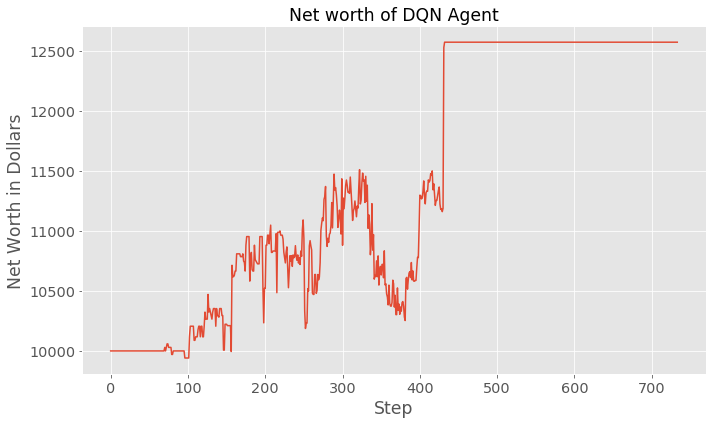

In [37]:
#Plot the networth
#dates = subset_data.index
plt.figure(figsize=(10, 6), tight_layout=True)
plt.plot(portfolio.performance.index, portfolio.performance['net_worth'], label="Net Worth")
plt.xlabel("Step")
plt.ylabel("Net Worth in Dollars")
plt.title("Net worth of DQN Agent")
plt.show()

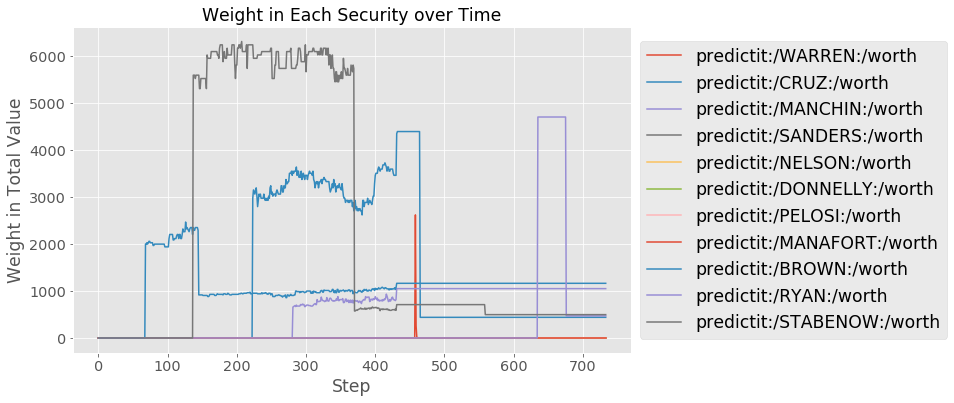

In [38]:
### Plot the total balance in each type of item
#First get the worth columns
p = portfolio.performance
p2 = p.iloc[:, :]
weights = p2.loc[:, [("/worth" in name) for name in p2.columns]]

#Now plot
weights.iloc[:,:].plot(figsize=(10, 6))
plt.xlabel("Step")
plt.ylabel("Weight in Total Value")
plt.title("Weight in Each Security over Time")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()


## Extra Stuff

In [ ]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)